In [311]:
# Import packages/libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # to add nice background to the plots
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn import linear_model
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from sklearn import metrics
from sklearn import datasets
from sklearn.impute import KNNImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from uszipcode import SearchEngine
from uszipcode import Zipcode
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# to display graphs in Jupyter notebook
%matplotlib inline       
#from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind# Load and Explore the Data

# Load and Explore the Data

In [117]:
data = pd.read_csv("Tourism.csv")
data.shape
df = data.copy()

### Check the number of rows and columns

In [118]:
df.shape

(4888, 20)

In [119]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'PreferredLoginDevice', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisited',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome'],
      dtype='object')

### Overview of Data

In [120]:
df.head(10)

,CustomerID,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.000000,Self Enquiry,3,6.000000,Salaried,Female,3,3.000000,Super Deluxe,3.000000,Single,1.000000,1,2,1,0.000000,Manager,20993.000000
1,200001,0,49.000000,Company Invited,1,14.000000,Salaried,Male,3,4.000000,Super Deluxe,4.000000,Divorced,2.000000,0,3,1,2.000000,Manager,20130.000000
2,200002,1,37.000000,Self Enquiry,1,8.000000,Free Lancer,Male,3,4.000000,Multi,3.000000,Single,7.000000,1,3,0,0.000000,Executive,17090.000000
3,200003,0,33.000000,Company Invited,1,9.000000,Salaried,Female,2,3.000000,Multi,3.000000,Divorced,2.000000,1,5,1,1.000000,Executive,17909.000000
4,200004,0,NaN,Self Enquiry,1,8.000000,Small Business,Male,2,3.000000,Multi,4.000000,Divorced,1.000000,0,5,1,0.000000,Executive,18468.000000
5,200005,0,32.000000,Company Invited,1,8.000000,Salaried,Male,3,3.000000,Multi,3.000000,Single,1.000000,0,5,1,1.000000,Executive,18068.000000
6,200006,0,59.000000,Self Enquiry,1,9.000000,Small Business,Female,2,2.000000,Multi,5.000000,Divorced,5.000000,1,2,1,1.000000,Executive,17670.000000
7,200007,0,30.000000,Self Enquiry,1,30.000000,Salaried,Male,3,3.000000,Multi,3.000000,Married,2.000000,0,2,0,1.000000,Executive,17693.000000
8,200008,0,38.000000,Company Invited,1,29.000000,Salaried,Male,2,4.000000,Standard,3.000000,Unmarried,1.000000,0,3,0,0.000000,Senior Manager,24526.000000
9,200009,0,36.000000,Self Enquiry,1,33.000000,Small Business,Male,3,3.000000,Super Deluxe,3.000000,Divorced,7.000000,0,3,1,0.000000,Manager,20237.000000


In [121]:
df.tail(10)

,CustomerID,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
4878,204878,1,35.000000,Self Enquiry,1,17.000000,Small Business,Male,3,4.000000,Super Deluxe,5.000000,Unmarried,3.000000,0,4,0,1.000000,Manager,24803.000000
4879,204879,1,26.000000,Self Enquiry,2,27.000000,Small Business,Female,4,4.000000,Multi,4.000000,Married,2.000000,1,3,0,2.000000,Executive,22347.000000
4880,204880,1,59.000000,Self Enquiry,1,28.000000,Small Business,Female,4,4.000000,Super Deluxe,4.000000,Married,6.000000,0,3,1,2.000000,Manager,28686.000000
4881,204881,1,41.000000,Self Enquiry,2,25.000000,Salaried,Male,3,2.000000,Multi,5.000000,Married,2.000000,0,1,1,2.000000,Executive,21065.000000
4882,204882,1,37.000000,Self Enquiry,2,20.000000,Salaried,Male,3,5.000000,Multi,5.000000,Married,6.000000,1,5,1,2.000000,Executive,23317.000000
4883,204883,1,49.000000,Self Enquiry,3,9.000000,Small Business,Male,3,5.000000,Super Deluxe,4.000000,Unmarried,2.000000,1,1,1,1.000000,Manager,26576.000000
4884,204884,1,28.000000,Company Invited,1,31.000000,Salaried,Male,4,5.000000,Multi,3.000000,Single,3.000000,1,3,1,2.000000,Executive,21212.000000
4885,204885,1,52.000000,Self Enquiry,3,17.000000,Salaried,Female,4,4.000000,Standard,4.000000,Married,7.000000,0,1,1,3.000000,Senior Manager,31820.000000
4886,204886,1,19.000000,Self Enquiry,3,16.000000,Small Business,Male,3,4.000000,Multi,3.000000,Single,3.000000,0,5,0,2.000000,Executive,20289.000000
4887,204887,1,36.000000,Self Enquiry,1,14.000000,Salaried,Male,4,4.000000,Multi,4.000000,Unmarried,3.000000,1,3,1,2.000000,Executive,24041.000000


### Check column types and missing values

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   PreferredLoginDevice     4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

### Check column with null values

In [123]:
df.isnull().sum().sort_values(ascending = False)

DurationOfPitch            251
MonthlyIncome              233
Age                        226
NumberOfTrips              140
NumberOfChildrenVisited     66
NumberOfFollowups           45
PreferredPropertyStar       26
PreferredLoginDevice        25
Designation                  0
OwnCar                       0
PitchSatisfactionScore       0
Passport                     0
CustomerID                   0
MaritalStatus                0
ProdTaken                    0
NumberOfPersonVisited        0
Gender                       0
Occupation                   0
CityTier                     0
ProductPitched               0
dtype: int64

### Summary of dataset

In [124]:
df.describe(include = 'all')

,CustomerID,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4863,4888.000000,4637.000000,4888,4888,4888.000000,4843.000000,4888,4862.000000,4888,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4888,4655.000000
unique,NaN,NaN,NaN,2,NaN,NaN,4,3,NaN,NaN,5,NaN,4,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,Self Enquiry,NaN,NaN,Salaried,Male,NaN,NaN,Multi,NaN,Married,NaN,NaN,NaN,NaN,NaN,Executive,NaN
freq,NaN,NaN,NaN,3444,NaN,NaN,2368,2916,NaN,NaN,1842,NaN,2340,NaN,NaN,NaN,NaN,NaN,1842,NaN
mean,202443.500000,0.188216,37.622265,NaN,1.654255,15.490835,NaN,NaN,2.905074,3.708445,NaN,3.581037,NaN,3.236521,0.290917,3.078151,0.620295,1.187267,NaN,23619.853491
std,1411.188388,0.390925,9.316387,NaN,0.916583,8.519643,NaN,NaN,0.724891,1.002509,NaN,0.798009,NaN,1.849019,0.454232,1.365792,0.485363,0.857861,NaN,5380.698361
min,200000.000000,0.000000,18.000000,NaN,1.000000,5.000000,NaN,NaN,1.000000,1.000000,NaN,3.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,1000.000000
25%,201221.750000,0.000000,31.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,3.000000,NaN,2.000000,0.000000,2.000000,0.000000,1.000000,NaN,20346.000000
50%,202443.500000,0.000000,36.000000,NaN,1.000000,13.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,3.000000,1.000000,1.000000,NaN,22347.000000
75%,203665.250000,0.000000,44.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,4.000000,1.000000,4.000000,1.000000,2.000000,NaN,25571.000000


### OBSERVATIONS:
* total no of rows is 4888
* total no of columns is 20
* dependent variable is ProdTaken
* more than 75% of customers did not get a Product , will find out actual % later
* DurationOfPitch, MonthlyIncome, Age, NumberOfTrips, NumberOfChildrenVisited, NumberOfFollowups, PreferredPropertyStar and PreferredLoginDevice have Null values
* the average age of customers is 37.62 years with a std of 9.3 years.
* average monthly income is about 23,600 with std of a little over 5000
* 3444 customers, almost 75%, had Self Enquiry as the preferred login device.
* 59.6% of the customers in data are males.
* Executive is the most common Deisgnation.
* ProdTaken, PreferredLoginDevice, CityTier, Occupation, Gender, NumberOfPersonVisited, NumberOfFollowups, ProductPitched, PreferredPropertyStar, MaritalStatus, NumberOfTrips, Passport,  PitchSatisfactionScore, OwnCar, NumberOfChildrenVisited and Designation need to be changed to category datatype.
* Age, DurationOfPitch and MonthlyIncome are skewed to the right.
* drop CustomerID column


In [125]:
# drop CustomerID

df.drop(['CustomerID'], axis=1, inplace = True)

In [126]:
df.head()

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,1,41.000000,Self Enquiry,3,6.000000,Salaried,Female,3,3.000000,Super Deluxe,3.000000,Single,1.000000,1,2,1,0.000000,Manager,20993.000000
1,0,49.000000,Company Invited,1,14.000000,Salaried,Male,3,4.000000,Super Deluxe,4.000000,Divorced,2.000000,0,3,1,2.000000,Manager,20130.000000
2,1,37.000000,Self Enquiry,1,8.000000,Free Lancer,Male,3,4.000000,Multi,3.000000,Single,7.000000,1,3,0,0.000000,Executive,17090.000000
3,0,33.000000,Company Invited,1,9.000000,Salaried,Female,2,3.000000,Multi,3.000000,Divorced,2.000000,1,5,1,1.000000,Executive,17909.000000
4,0,NaN,Self Enquiry,1,8.000000,Small Business,Male,2,3.000000,Multi,4.000000,Divorced,1.000000,0,5,1,0.000000,Executive,18468.000000


#### Change ProdTaken, PreferredLoginDevice, CityTier, Occupation, Gender, NumberOfPersonVisited, NumberOfFollowups, ProductPitched, PreferredPropertyStar, MaritalStatus, NumberOfTrips, Passport,  PitchSatisfactionScore, OwnCar, NumberOfChildrenVisited and Designation to category data type

In [127]:
df['ProdTaken'] = df['ProdTaken'].astype('category')
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].astype('category')
df['CityTier'] = df['CityTier'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')
df['NumberOfPersonVisited'] = df['NumberOfPersonVisited'].astype('category')
df['NumberOfFollowups'] = df['NumberOfFollowups'].astype('category')
df['ProductPitched'] = df['ProductPitched'].astype('category')
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')
df['Passport'] = df['Passport'].astype('category')
df['PitchSatisfactionScore'] = df['PitchSatisfactionScore'].astype('category')
df['OwnCar'] = df['OwnCar'].astype('category')
df['NumberOfChildrenVisited'] = df['NumberOfChildrenVisited'].astype('category')
df['Designation'] = df['Designation'].astype('category')
#df['NumberOfTrips'] = df['NumberOfChildrenVisited'].astype('category')


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ProdTaken                4888 non-null   category
 1   Age                      4662 non-null   float64 
 2   PreferredLoginDevice     4863 non-null   category
 3   CityTier                 4888 non-null   category
 4   DurationOfPitch          4637 non-null   float64 
 5   Occupation               4888 non-null   category
 6   Gender                   4888 non-null   object  
 7   NumberOfPersonVisited    4888 non-null   category
 8   NumberOfFollowups        4843 non-null   category
 9   ProductPitched           4888 non-null   category
 10  PreferredPropertyStar    4862 non-null   category
 11  MaritalStatus            4888 non-null   category
 12  NumberOfTrips            4748 non-null   float64 
 13  Passport                 4888 non-null   category
 14  PitchSat

In [129]:
 df.ProdTaken.unique()

[1, 0]
Categories (2, int64): [1, 0]

In [130]:
 df.Age.unique()

array([41., 49., 37., 33., nan, 32., 59., 30., 38., 36., 35., 31., 34.,
       28., 29., 22., 53., 21., 42., 44., 46., 39., 24., 43., 50., 27.,
       26., 48., 55., 45., 56., 23., 51., 40., 54., 58., 20., 25., 19.,
       57., 52., 47., 18., 60., 61.])

In [131]:
 df.PreferredLoginDevice.unique()

['Self Enquiry', 'Company Invited', NaN]
Categories (2, object): ['Self Enquiry', 'Company Invited']

In [132]:
 df.CityTier.unique()

[3, 1, 2]
Categories (3, int64): [3, 1, 2]

In [133]:
 df.DurationOfPitch.unique()

array([  6.,  14.,   8.,   9.,  30.,  29.,  33.,  22.,  21.,  32.,  25.,
        27.,  11.,  17.,  15.,  13.,  12.,  16.,  10.,  31.,  18.,  nan,
        24.,  35.,  28.,  20.,  26.,  34.,  23.,   5.,  19., 126.,   7.,
        36., 127.])

In [134]:
 df.Occupation.unique()

['Salaried', 'Free Lancer', 'Small Business', 'Large Business']
Categories (4, object): ['Salaried', 'Free Lancer', 'Small Business', 'Large Business']

In [135]:
 df.Gender.unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

In [136]:
df.groupby('Gender').size()

Gender
Fe Male     155
Female     1817
Male       2916
dtype: int64

#### OBSERVATIONS:

Fix Fe Male in Gender, it is a typo, change to Female

#### Change all Fe Male to Female in Gender:


In [137]:
# function to fix Fe Male

def FeMale_to_Female(female):
    if isinstance(female,str):
        return (female.replace('Fe Male','Female'))
    else:
        return np.nan

In [138]:
#apply function to Gender column
df['Gender'] = df['Gender'].astype('string')

df['Gender'] = df['Gender'].apply(FeMale_to_Female)


In [139]:
# check Gender unique values

df.groupby('Gender').size()

Gender
Female    1972
Male      2916
dtype: int64

In [140]:
 df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [141]:
df['Gender'] = df['Gender'].astype('category')

In [142]:
 df.NumberOfPersonVisited.unique()

[3, 2, 1, 4, 5]
Categories (5, int64): [3, 2, 1, 4, 5]

In [143]:
 df.NumberOfFollowups.unique()

[3.000000, 4.000000, 2.000000, 5.000000, NaN, 1.000000, 6.000000]
Categories (6, float64): [3.000000, 4.000000, 2.000000, 5.000000, 1.000000, 6.000000]

In [144]:
 df.ProductPitched.unique()

['Super Deluxe', 'Multi', 'Standard', 'Deluxe', 'King']
Categories (5, object): ['Super Deluxe', 'Multi', 'Standard', 'Deluxe', 'King']

In [145]:
 df.PreferredPropertyStar.unique()

[3.000000, 4.000000, 5.000000, NaN]
Categories (3, float64): [3.000000, 4.000000, 5.000000]

In [146]:
 df.MaritalStatus.unique()

['Single', 'Divorced', 'Married', 'Unmarried']
Categories (4, object): ['Single', 'Divorced', 'Married', 'Unmarried']

In [147]:
 df.NumberOfTrips.unique()

array([ 1.,  2.,  7.,  5.,  6.,  3.,  4., 19., 21.,  8., nan, 20., 22.])

In [148]:
df.groupby('NumberOfTrips').size()

NumberOfTrips
1.000000      620
2.000000     1464
3.000000     1079
4.000000      478
5.000000      458
6.000000      322
7.000000      218
8.000000      105
19.000000       1
20.000000       1
21.000000       1
22.000000       1
dtype: int64

In [149]:
 df.Passport.unique()

[1, 0]
Categories (2, int64): [1, 0]

In [150]:
 df.PitchSatisfactionScore.unique()

[2, 3, 5, 4, 1]
Categories (5, int64): [2, 3, 5, 4, 1]

In [151]:
 df.OwnCar.unique()

[1, 0]
Categories (2, int64): [1, 0]

In [152]:
 df.NumberOfChildrenVisited.unique()

[0.000000, 2.000000, 1.000000, NaN, 3.000000]
Categories (4, float64): [0.000000, 2.000000, 1.000000, 3.000000]

In [153]:
 df.Designation.unique()

['Manager', 'Executive', 'Senior Manager', 'AVP', 'VP']
Categories (5, object): ['Manager', 'Executive', 'Senior Manager', 'AVP', 'VP']

In [154]:
 df.MonthlyIncome.unique()

array([20993., 20130., 17090., ..., 22097., 22995., 21471.])

#### Fix null values

In [155]:
df.isnull().sum().sort_values(ascending = False)

DurationOfPitch            251
MonthlyIncome              233
Age                        226
NumberOfTrips              140
NumberOfChildrenVisited     66
NumberOfFollowups           45
PreferredPropertyStar       26
PreferredLoginDevice        25
Designation                  0
OwnCar                       0
PitchSatisfactionScore       0
Passport                     0
ProdTaken                    0
MaritalStatus                0
NumberOfPersonVisited        0
Gender                       0
Occupation                   0
CityTier                     0
ProductPitched               0
dtype: int64

In [156]:
df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(), inplace = True)

In [157]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace = True)

In [158]:
df['Age'].fillna(df['Age'].median(), inplace = True)


In [159]:
df.isnull().sum().sort_values(ascending = False)

NumberOfTrips              140
NumberOfChildrenVisited     66
NumberOfFollowups           45
PreferredPropertyStar       26
PreferredLoginDevice        25
ProdTaken                    0
MaritalStatus                0
Designation                  0
OwnCar                       0
PitchSatisfactionScore       0
Passport                     0
ProductPitched               0
Age                          0
NumberOfPersonVisited        0
Gender                       0
Occupation                   0
DurationOfPitch              0
CityTier                     0
MonthlyIncome                0
dtype: int64

In [160]:
#imputer = KNNImputer(n_neighbors=5)

In [161]:
#df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [162]:
null_data = df[df.isnull().any(axis=1)]

In [163]:
df.isnull().any(axis = 1).sum()

302

In [164]:
df.describe(include = 'all')

,ProdTaken,Age,PreferredLoginDevice,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
count,4888.000000,4888.000000,4863,4888.000000,4888.000000,4888,4888,4888.000000,4843.000000,4888,4862.000000,4888,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4888,4888.000000
unique,2.000000,NaN,2,3.000000,NaN,4,2,5.000000,6.000000,5,3.000000,4,NaN,2.000000,5.000000,2.000000,4.000000,5,NaN
top,0.000000,NaN,Self Enquiry,1.000000,NaN,Salaried,Male,3.000000,4.000000,Multi,3.000000,Married,NaN,0.000000,3.000000,1.000000,1.000000,Executive,NaN
freq,3968.000000,NaN,3444,3190.000000,NaN,2368,2916,2402.000000,2068.000000,1842,2993.000000,2340,NaN,3466.000000,1478.000000,3032.000000,2080.000000,1842,NaN
mean,NaN,37.547259,NaN,NaN,15.362930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.236521,NaN,NaN,NaN,NaN,NaN,23559.179419
std,NaN,9.104795,NaN,NaN,8.316166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.849019,NaN,NaN,NaN,NaN,NaN,5257.862921
min,NaN,18.000000,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1000.000000
25%,NaN,31.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,20485.000000
50%,NaN,36.000000,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,22347.000000
75%,NaN,43.000000,NaN,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,25424.750000


In [165]:
df['NumberOfTrips'].fillna(df['NumberOfTrips'].mode()[0], inplace = True)

In [166]:
df['NumberOfChildrenVisited'].fillna(df['NumberOfChildrenVisited'].mode()[0], inplace = True)

In [167]:
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0], inplace = True)

In [168]:
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0], inplace = True)

In [169]:
df['PreferredLoginDevice'].fillna(df['PreferredLoginDevice'].mode()[0], inplace = True)

In [170]:
df.isnull().sum().sort_values(ascending = False)

ProdTaken                  0
PreferredPropertyStar      0
Designation                0
NumberOfChildrenVisited    0
OwnCar                     0
PitchSatisfactionScore     0
Passport                   0
NumberOfTrips              0
MaritalStatus              0
ProductPitched             0
Age                        0
NumberOfFollowups          0
NumberOfPersonVisited      0
Gender                     0
Occupation                 0
DurationOfPitch            0
CityTier                   0
PreferredLoginDevice       0
MonthlyIncome              0
dtype: int64

## EDA numerical data

### Univariate Analysis - Numerical

In [171]:
pd.set_option('display.float_format', lambda x: '%3f' %x)  #to display numbers in digits

In [172]:
# function to plot boxplot and histogram of variable

def histo_box(data,figsize=(15,10), bins =None):
    
    f,(ax_box,ax_hist) = plt.subplots(2,sharex=True, gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize )
    
    sns.boxplot(data,ax = ax_box, showmeans=True, color='violet') #plot a boxplot of data with a green triangle marking the mean value 

    
    sns.distplot(data,kde = False, ax = ax_hist)      # plot histogram of data

    ax_hist.axvline(np.mean(data),color = 'green', linestyle = '--')
    ax_hist.axvline(np.median(data),color = 'black', linestyle = '-')
    plt.show()
 #   sns.violinplot(data, ax = ax_violin, showmeans = True)              # violin plot of data
    

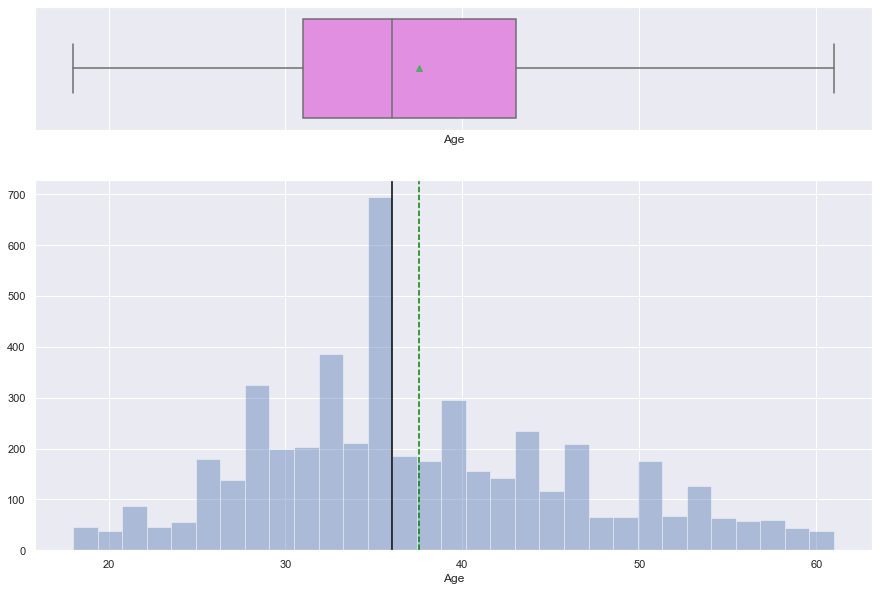

In [173]:
#see distribution for Age

histo_box(df['Age'])

####   OBSERVATIONS:
* Age does not have any outliers.
* Age is right skewed  

In [174]:
df['Age'].mode()

0   36.000000
dtype: float64

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ProdTaken                4888 non-null   category
 1   Age                      4888 non-null   float64 
 2   PreferredLoginDevice     4888 non-null   category
 3   CityTier                 4888 non-null   category
 4   DurationOfPitch          4888 non-null   float64 
 5   Occupation               4888 non-null   category
 6   Gender                   4888 non-null   category
 7   NumberOfPersonVisited    4888 non-null   category
 8   NumberOfFollowups        4888 non-null   category
 9   ProductPitched           4888 non-null   category
 10  PreferredPropertyStar    4888 non-null   category
 11  MaritalStatus            4888 non-null   category
 12  NumberOfTrips            4888 non-null   float64 
 13  Passport                 4888 non-null   category
 14  PitchSat

####   OBSERVATIONS:
* DurationOfPitchge does not have any outliers.
* DurationOfPitch is right skewed 

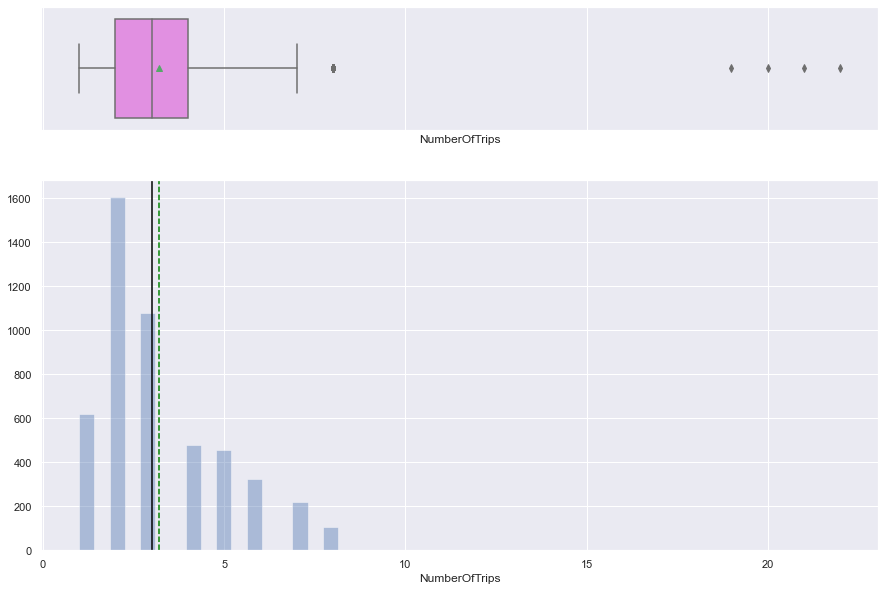

In [176]:
#see distribution for NumberOfTrips

histo_box(df['NumberOfTrips'])

####   OBSERVATIONS:
* NumberOfTrips does not have any outliers.
* NumberOfTrips is very slightly right skewed 
* almost 2700(about 55%) of the people took either 2 or 3 day trips

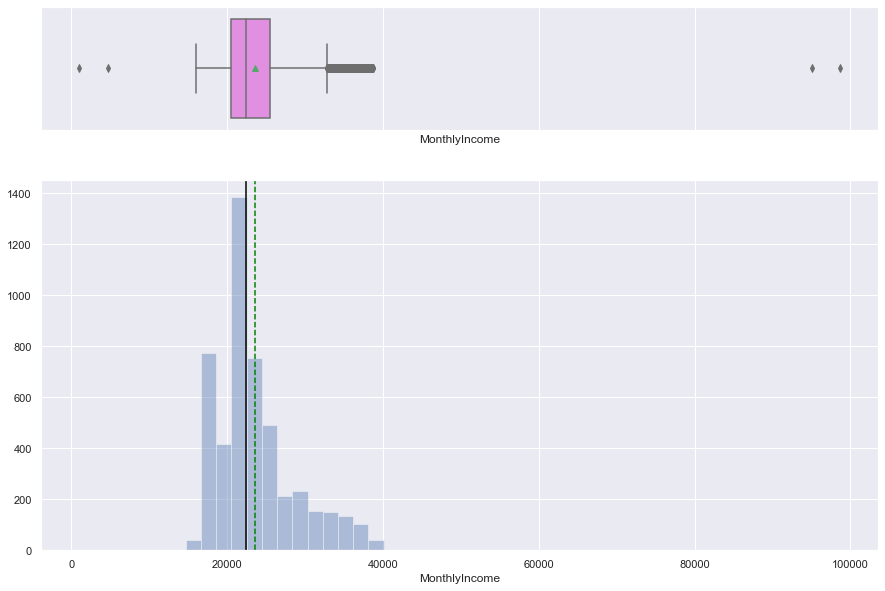

In [177]:
#see distribution for MonthlyIncome

histo_box(df['MonthlyIncome'])

####   OBSERVATIONS:
* MonthlyIncome has some outliers.
* MonthlyIncome is slightly right skewed 

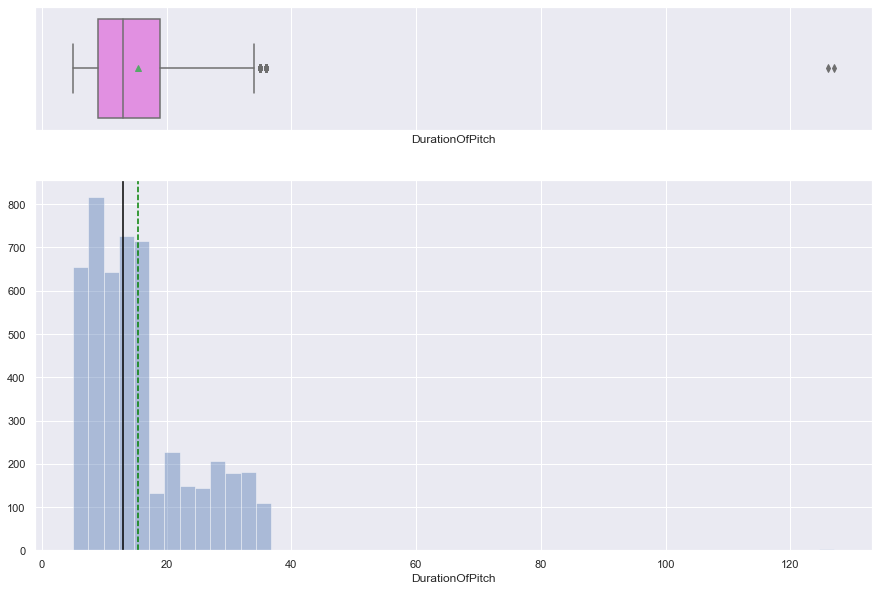

In [178]:
#see distribution for DurationOfPitch

histo_box(df['DurationOfPitch'])

####   OBSERVATIONS:
* DurationOfPitch has a few outliers.
* DurationOfPitch is right skewed 

## EDA Categorical Data

### Univariate Analysis - Categorical

In [179]:
#function to plot the percentages on the barplots.


def percentage_barplot(ax, feature):
    
   
    total = len(feature)  #length of column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # calculate percentage
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x,y), size = 12)
    plt.show() #show the plot


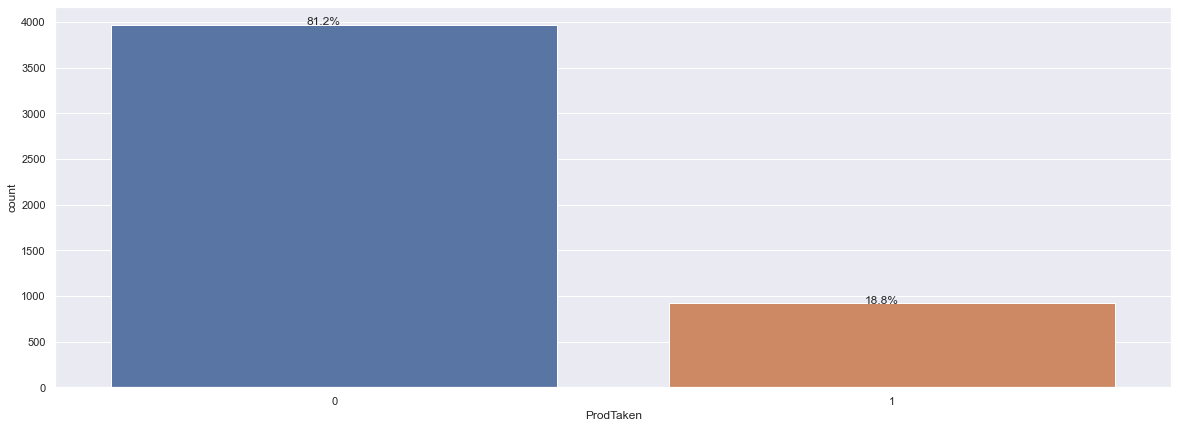

In [180]:
#ProdTaken

plt.figure(figsize = (20,7))
ax = sns.countplot(df['ProdTaken'])
percentage_barplot(ax,df['ProdTaken'])


####   OBSERVATIONS:
* 18.8% of customers bought the holiday package last year
* 81.2% of customers did not buy a package
* A lot of customers who might have purchased the plan were probably not even called as the calls were random

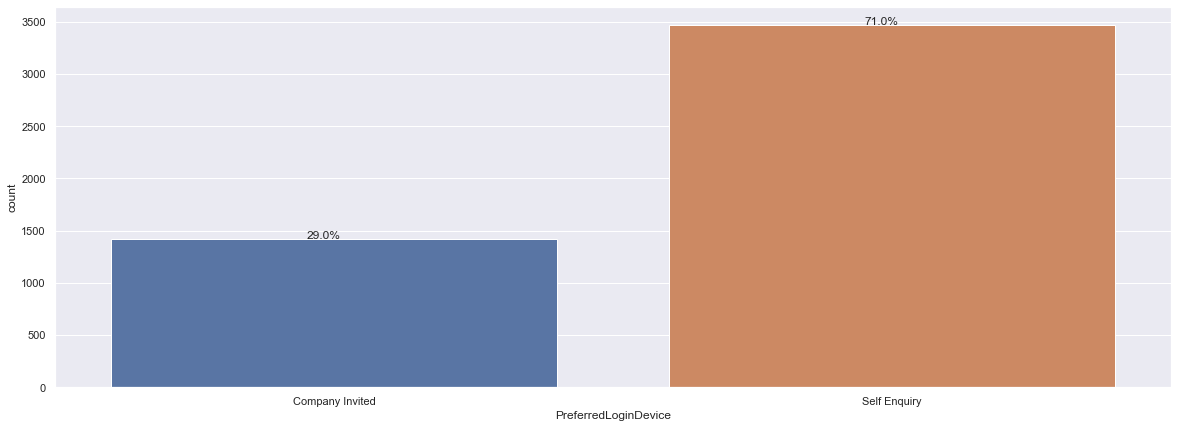

In [181]:
#PreferredLoginDevice

plt.figure(figsize = (20,7))
ax = sns.countplot(df['PreferredLoginDevice'])
percentage_barplot(ax,df['PreferredLoginDevice'])


####   OBSERVATIONS:
* 71% of customers have done Self Enquiry in the last month
* will have to check if most customers who purchased the plans had done self enquiry or had been contacted by the company

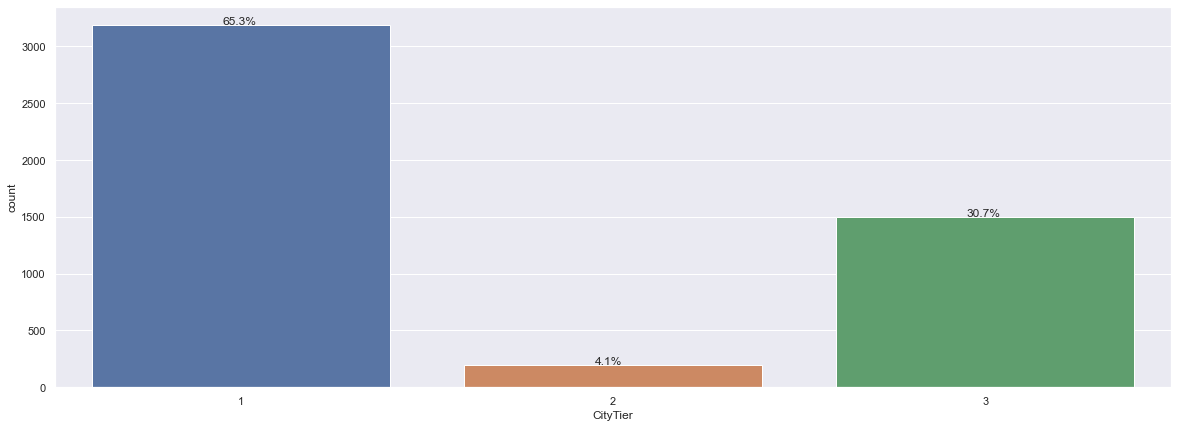

In [182]:
#CityTier

plt.figure(figsize = (20,7))
ax = sns.countplot(df['CityTier'])
percentage_barplot(ax,df['CityTier'])

####   OBSERVATIONS:
* 65.3% of customers live in Tier 1, that is large, cities with developed markets.
* majority of the rest, 30.7% live in Tier 3 cities that have underdeveloped markets.
* there are barely any customers,onky 4.1%, who live in mid size cities with developing cities
* will check which city do most of the customers who buy the pacakge come from, my guess is that it will be Tier 1 city


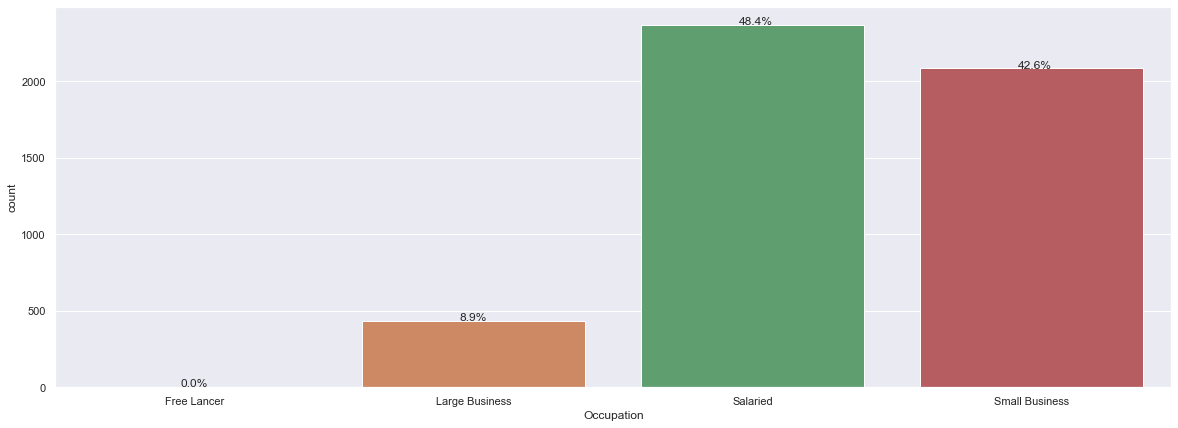

In [183]:
#Occupation

plt.figure(figsize = (20,7))
ax = sns.countplot(df['Occupation'])
percentage_barplot(ax,df['Occupation'])

####   OBSERVATIONS:
* Majority of customers, 48.4%, are salaried followed closely by small business owners at 42.6%
* Only about 9% of customers own large businesses
* None of the customers do any free lance work, maybe because income is not as stable, so they dont travel that much?


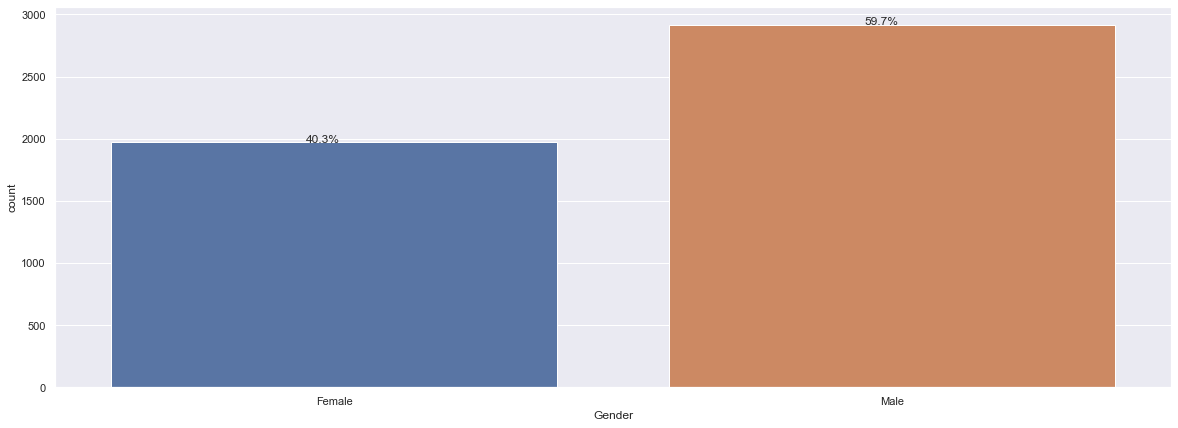

In [184]:
#Gender

plt.figure(figsize = (20,7))
ax = sns.countplot(df['Gender'])
percentage_barplot(ax,df['Gender'])

####   OBSERVATIONS:
* Majority of customers, almost 60%, are men
* would be interesting to see which gender bought the package more

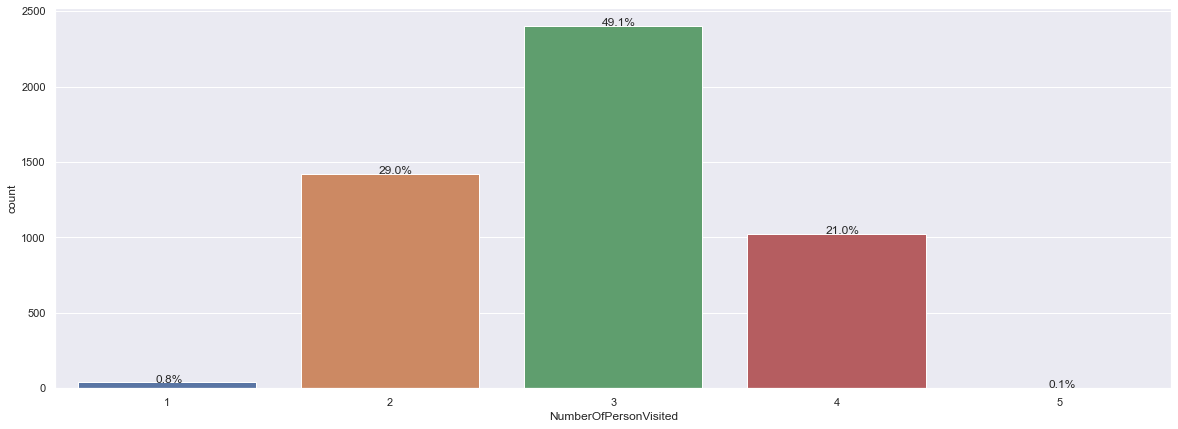

In [185]:
#NumberOfPersonVisited

plt.figure(figsize = (20,7))
ax = sns.countplot(df['NumberOfPersonVisited'])
percentage_barplot(ax,df['NumberOfPersonVisited'])

####   OBSERVATIONS:
* Almost half of the customers, 49.1%, had 3 people come with them on the vacation 
* 2 and 4 were the other two popular number of people who went on the vacation with the people

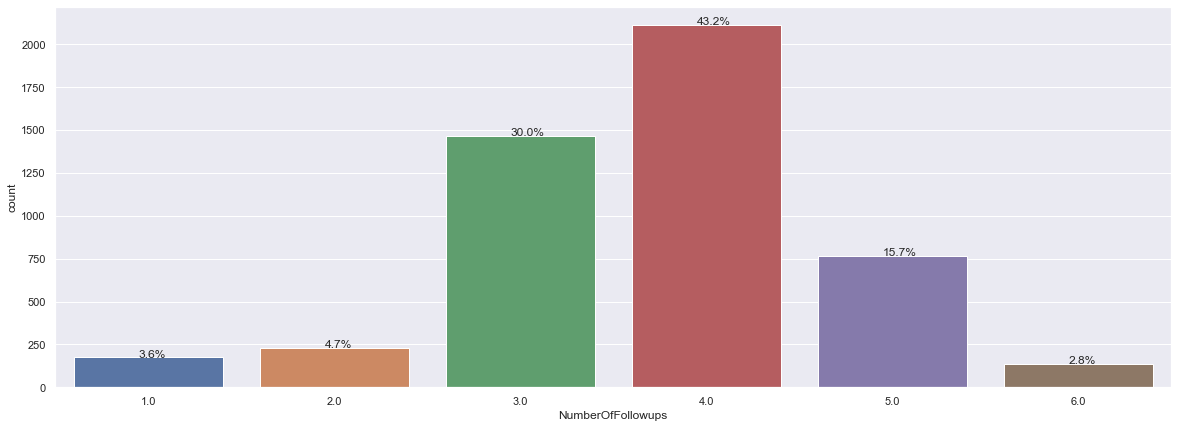

In [186]:
#NumberOfFollowups

plt.figure(figsize = (20,7))
ax = sns.countplot(df['NumberOfFollowups'])
percentage_barplot(ax,df['NumberOfFollowups'])

####   OBSERVATIONS:
* Salesperson followed up 4 times with 43.2% of the customers, followed by 3 times with 30% of the customers
* 1,2 and 6 followups were rare, 15.7% of customers got 5 follow up calls after sales pitch.
* interesting to see if higher number of followups increases the chances of the customer buying a plan

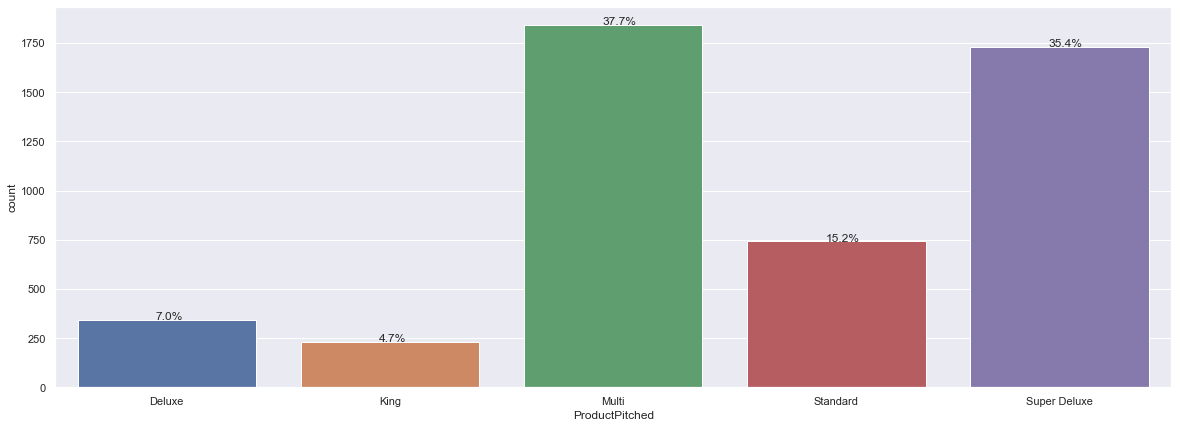

In [187]:
#ProductPitched

plt.figure(figsize = (20,7))
ax = sns.countplot(df['ProductPitched'])
percentage_barplot(ax,df['ProductPitched'])

####   OBSERVATIONS:
* Multi package was pitched to the most customers, 37.7% 
* Super Deluxe was the next most pitched package to 35.4% of the customers
* Standard package was pitched to 15.2%
* Deluxe and King were pitched to less than 12% of the customers
* Explore what demographic was each package pitched to wrt monthly income, marital status,Gender and occupation


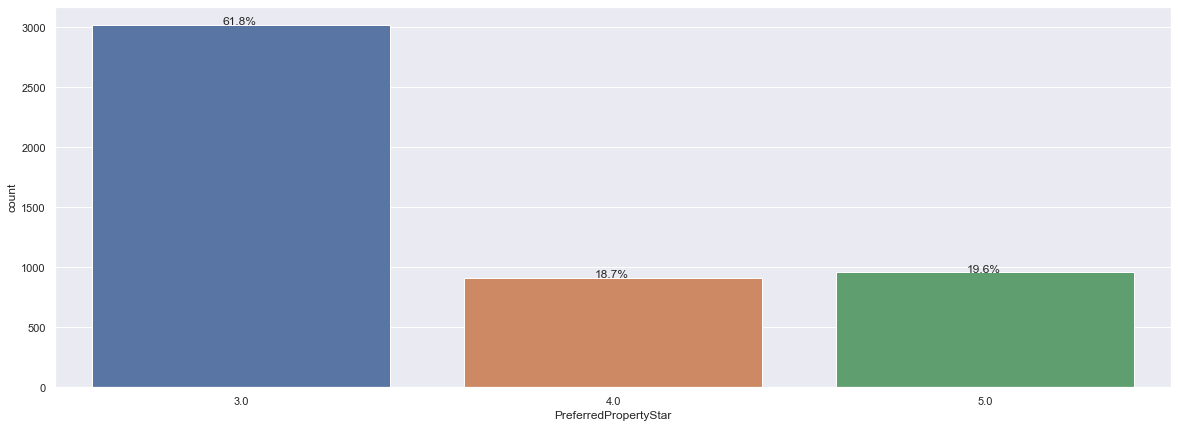

In [188]:
#PreferrefPropertyStar

plt.figure(figsize = (20,7))
ax = sns.countplot(df['PreferredPropertyStar'])
percentage_barplot(ax,df['PreferredPropertyStar'])

####   OBSERVATIONS:
* The most preferred property star rating is 3 stars with almost 62% of customers preferring that
* rest of the customers have an equal preference for 4 and 5 stars
* a smaller number of customers can probably afford 4 and 5 stars properties and may have higher income, will investigate with monthly income, age and occupation

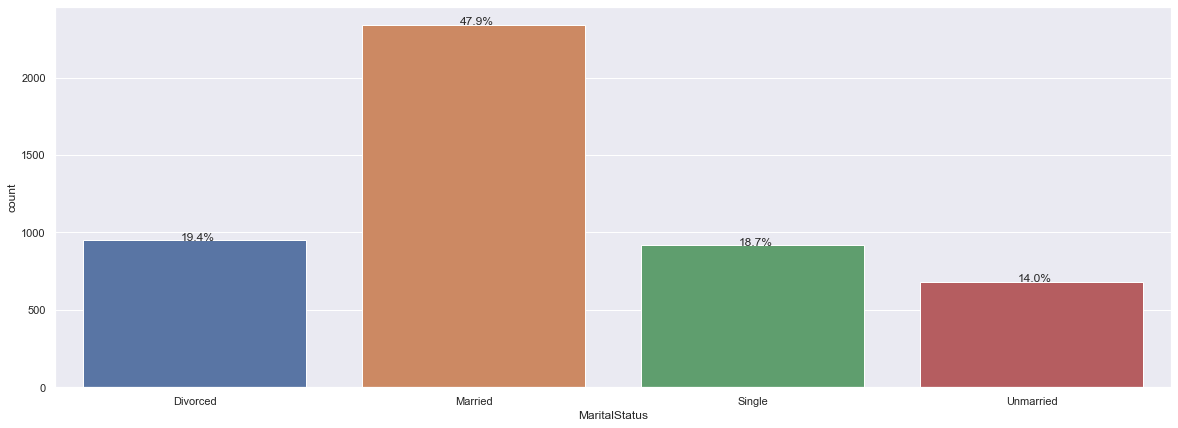

In [189]:
#MaritalStatus

plt.figure(figsize = (20,7))
ax = sns.countplot(df['MaritalStatus'])
percentage_barplot(ax,df['MaritalStatus'])

####   OBSERVATIONS:
* Majority, about 48% of the customers are Married.
* Divorced and SIngle customers are very close in porportion 
* Only 14% of the customers are Unmarried
* Investigate: Did married couples buy more packages?


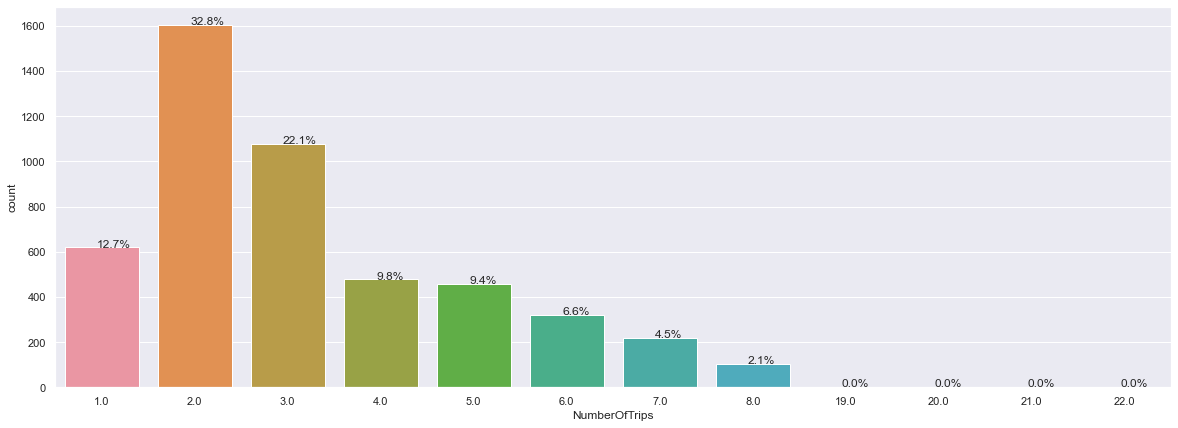

In [190]:
#NumberOfTrips

plt.figure(figsize = (20,7))
ax = sns.countplot(df['NumberOfTrips'])
percentage_barplot(ax,df['NumberOfTrips'])

####   OBSERVATIONS:
* 32.8% of customers took 2 trips in a year
* 12.7% of customers took less than 2 trips per year 
* 54.5% of customers took morethan 2 trips per year
* very small percentage took more than 8 trips a year, theyre outliers in the data, do they travel for work?


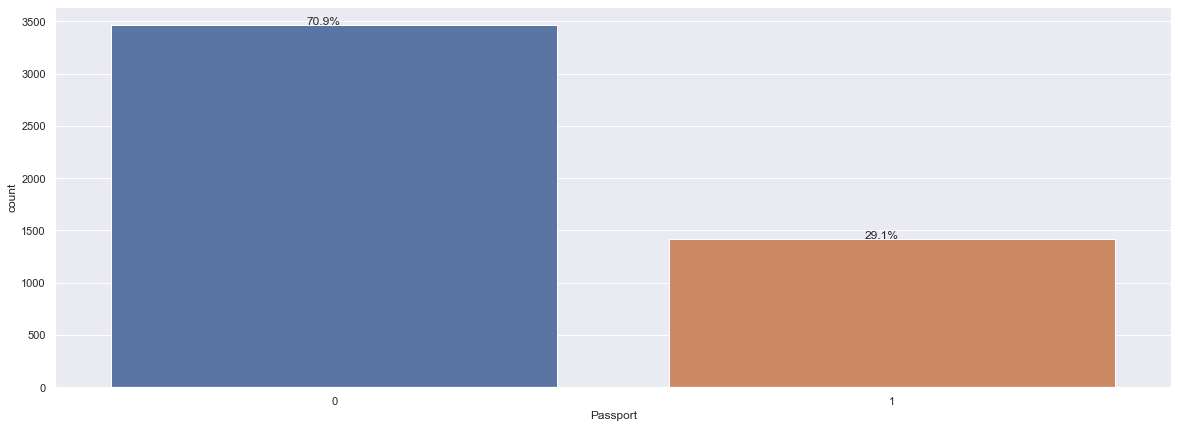

In [191]:
#Passport

plt.figure(figsize = (20,7))
ax = sns.countplot(df['Passport'])
percentage_barplot(ax,df['Passport'])

####   OBSERVATIONS:
* almost 71% of the customers do not have a passport
* only 29% of customers have a passport
* does having a passport correspond with buying a more expensive package, as it could be travel outside the country, which could be a more costly package?

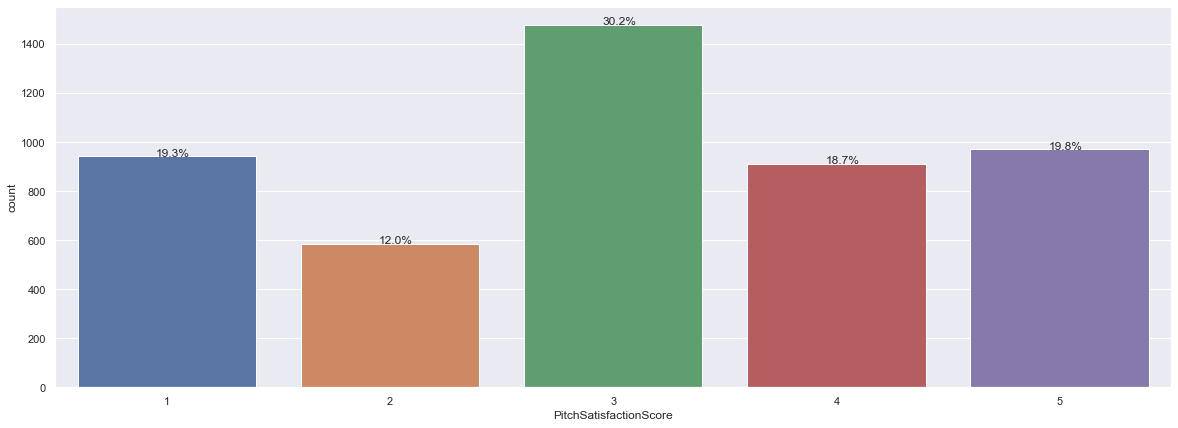

In [192]:
#PitchSatisfactionScore

plt.figure(figsize = (20,7))
ax = sns.countplot(df['PitchSatisfactionScore'])
percentage_barplot(ax,df['PitchSatisfactionScore'])

####   OBSERVATIONS:
* 30.2% of customers gvae the pitch a satisfaction score of only 3. 
* 38.5% of cusotmers gave scores of more than 3
* 21.3% of the customers gave scores of less than 3
* Salespeople need to be traiend better so they can get better pitch satisfaction scores, maybe some kind of a workshop is needed based on the feedback. Goal should be nothing less than a 4 at least.
* what scores did those customers give who bought the package?


## EDA BiVariate analysis

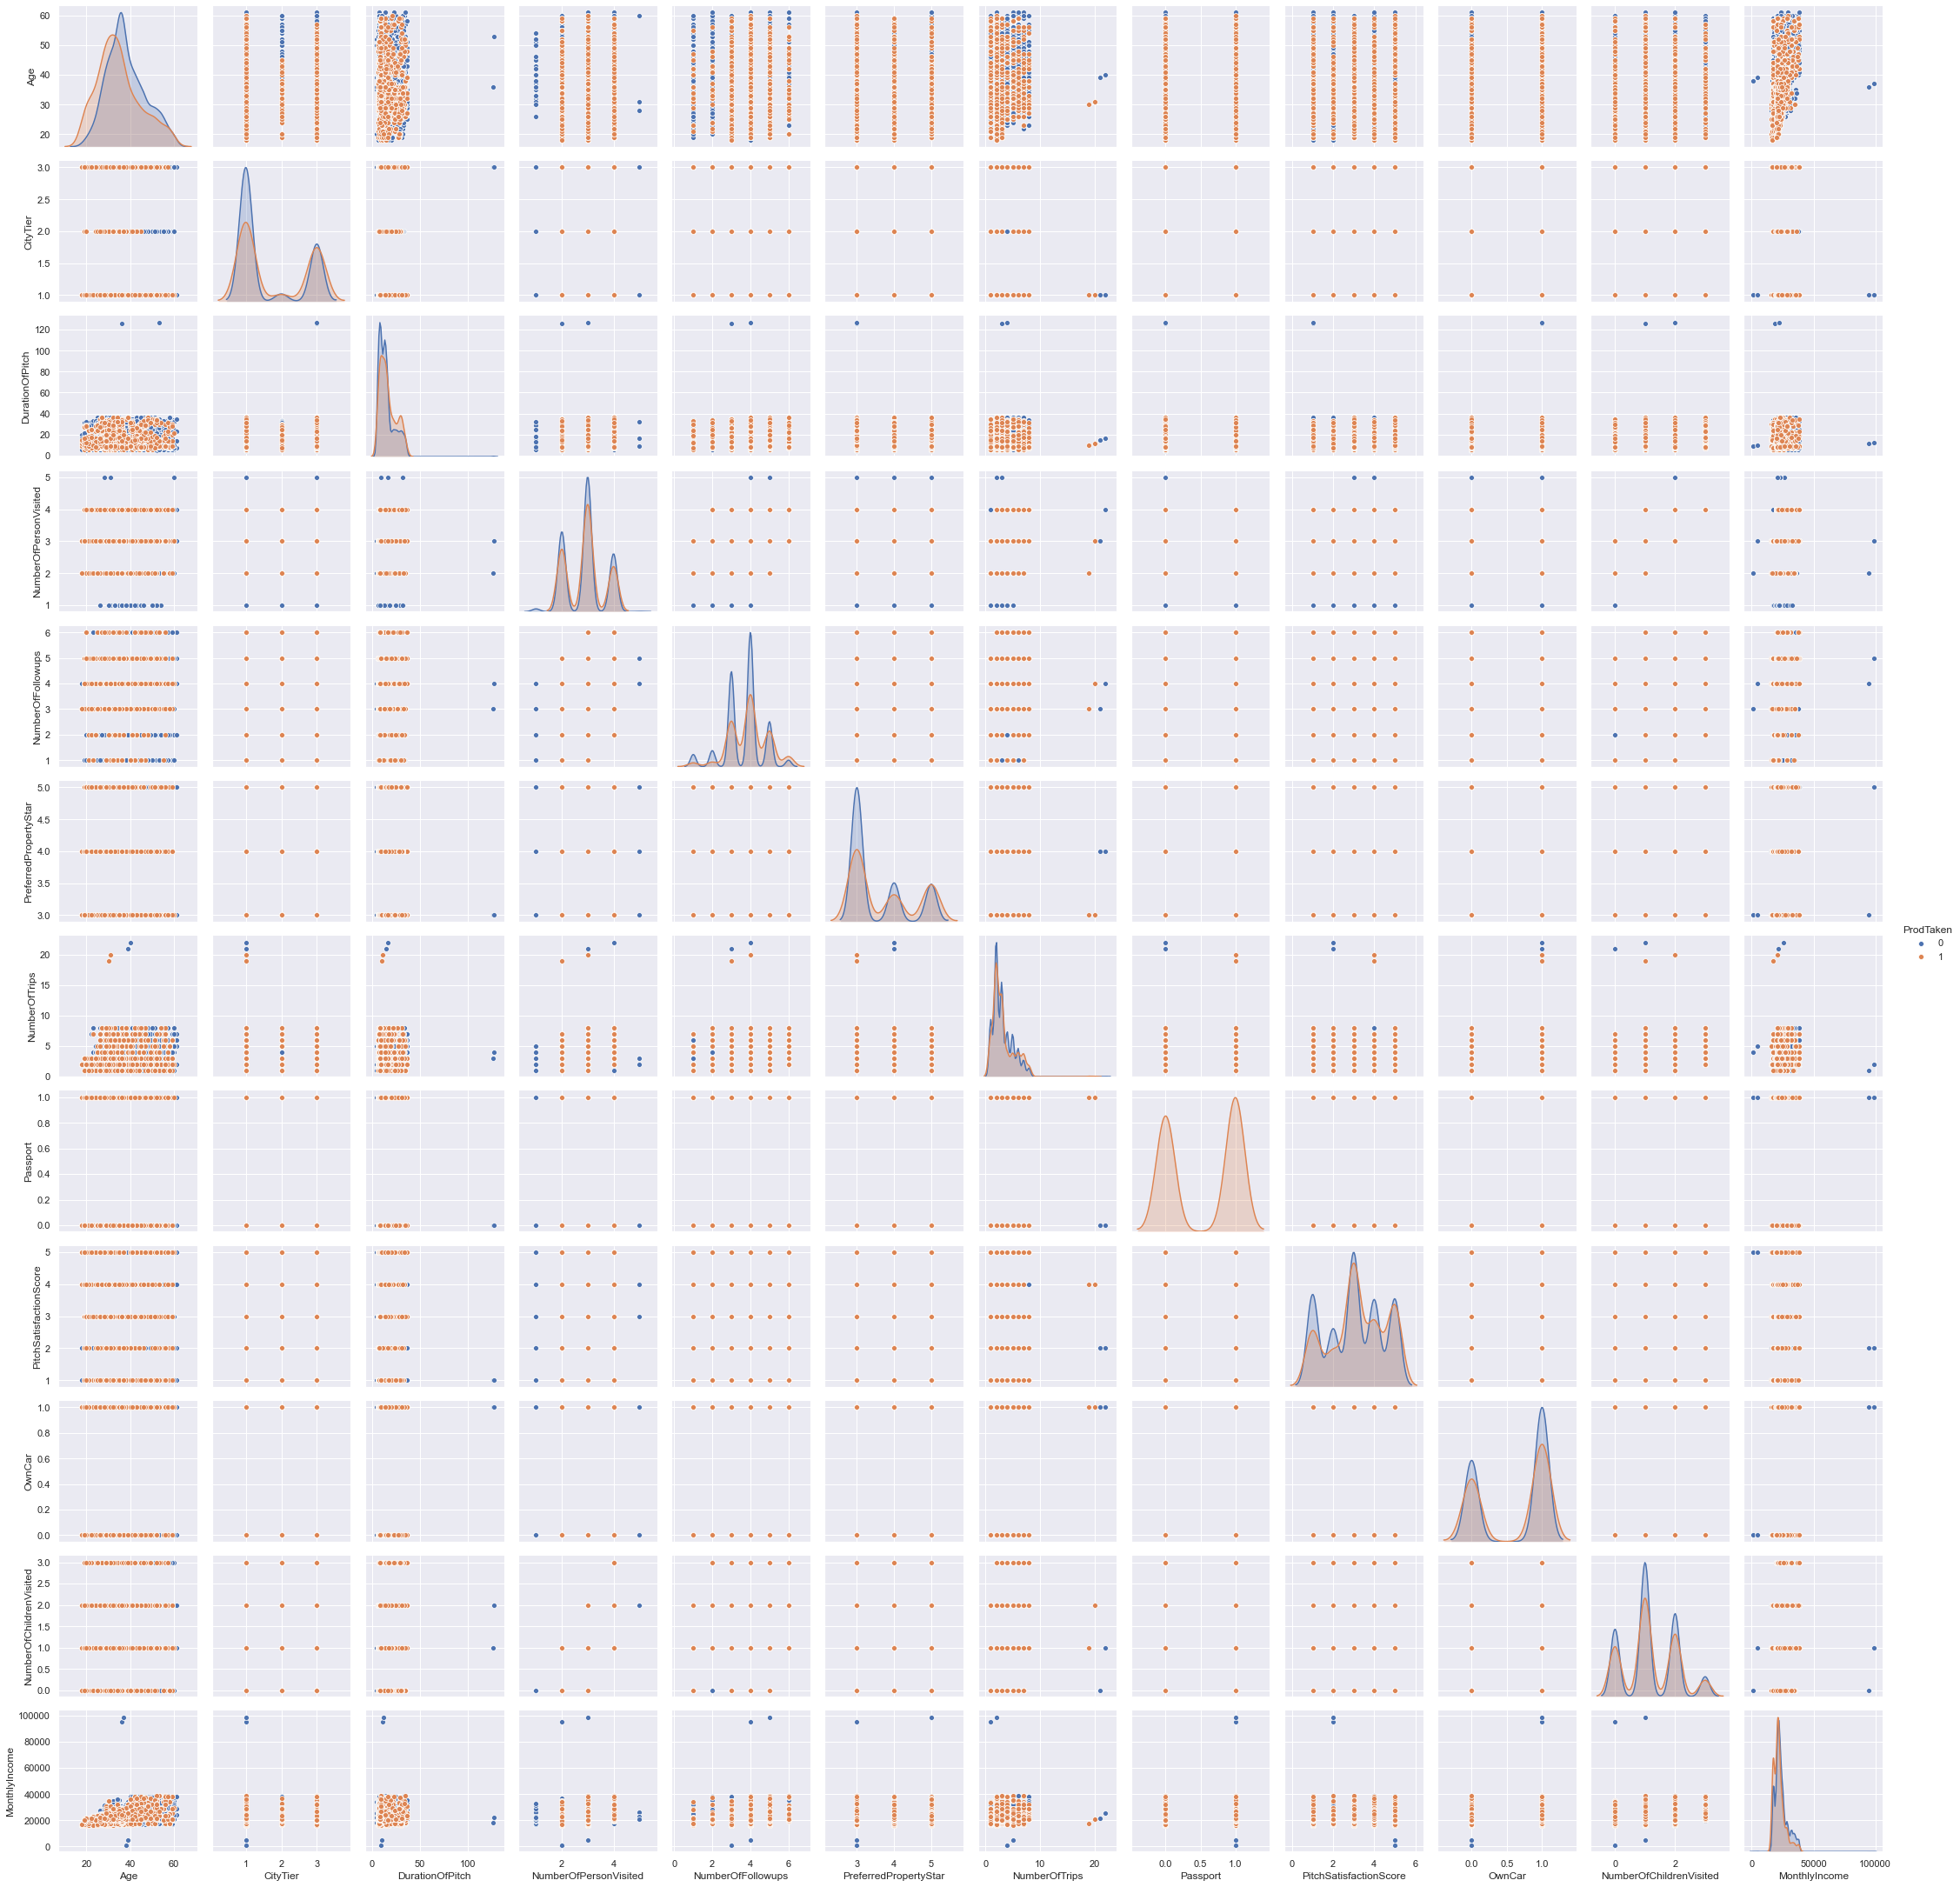

In [193]:
# Pairplot of all variables

sns.pairplot(data=df, hue = 'ProdTaken')
plt.show()

####   OBSERVATIONS:
* Customers who bought a package had Monthly Income from about 25,000 to 40,000
* Customers who had 1 and 5 people visit with them did not buy any packages
* Duration of Pitch was considerably shorter for customer who made more than 15 trips per year
* Customers with Highest monthly income live in Tier 1 city which was expected
* Customer who made the highest number of trips per year are from Tier 1 city. Their Monthly income could be high or they could be trvaelling for work
* The longest Duration of Pitch was with customers in Tier 3 cities who had lower monthly income around 20,000, took less than 5 trips per year, and had the lowest preferred property star of 3 and they did not even buy any package.
* Customers who had 5 people visit, had 2 children with them and gave a higher satisfaction score. These customers took 2-3 trips per year and require at least 4 or 5 followups to the pitch.
* Cusrtomers who have 1 and 5 persons visit with them did not buy any package
* All customers who required 6 followups had children
* Customers who made more than 15 trips in a year preferred either 3 or 4 star properties
* Surprisingly, the customers with the highest Monthly Income, make fewer than 5 trips annualy.

### CORREALTION MATRIX OF NUMERICAL VARIABLES

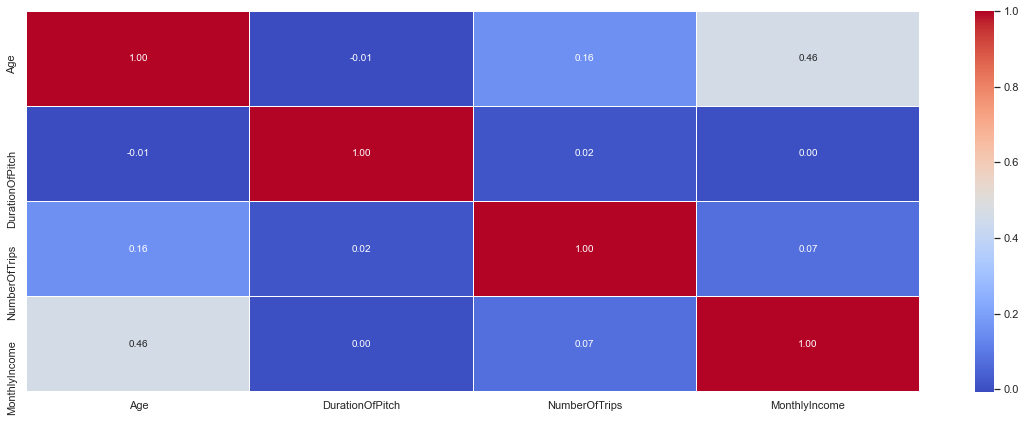

In [194]:
plt.figure(figsize = (20,7))
sns.heatmap(df.corr(), annot=True, linewidths = 0.05, fmt = '.2f', cmap="coolwarm") 


####   OBSERVATIONS:
* There is some moderate positive correlation between MonthlyIncome and Age
* There is no real correlation between other features.

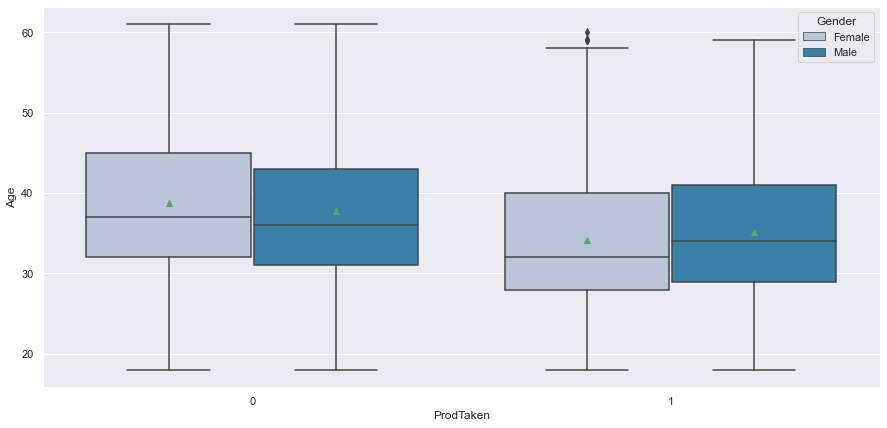

In [195]:
plt.figure(figsize=(15,7))
sns.boxplot(df["ProdTaken"],df["Age"],hue = df["Gender"], showmeans = True, palette="PuBu")
plt.show()

####   OBSERVATIONS:
* Average age of customers who bought the package is lower than that of those who didnt buy.
* there are some outliers in Females who bought a package which may be pulling up the average age of Females who bought a package

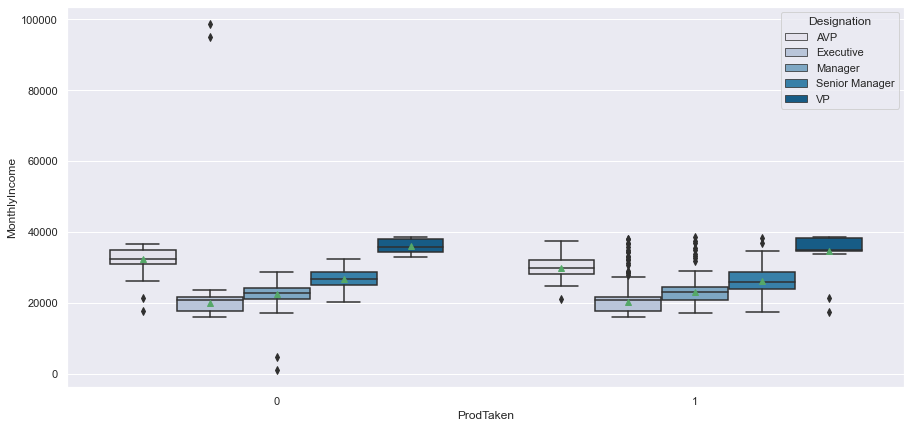

In [196]:
plt.figure(figsize=(15,7))
sns.boxplot(df["ProdTaken"],df["MonthlyIncome"],hue = df["Designation"], showmeans = True, palette="PuBu")
plt.show()

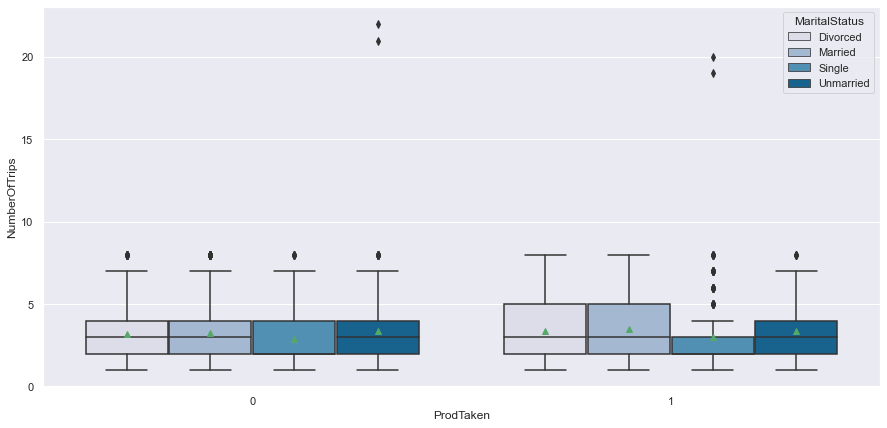

In [197]:
plt.figure(figsize=(15,7))
sns.boxplot(df["ProdTaken"],df["NumberOfTrips"],hue = df["MaritalStatus"], showmeans = True, palette="PuBu")
plt.show()

In [198]:
### Function to plot stacked bar charts for categorical columns
def stacked_bar_chart(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


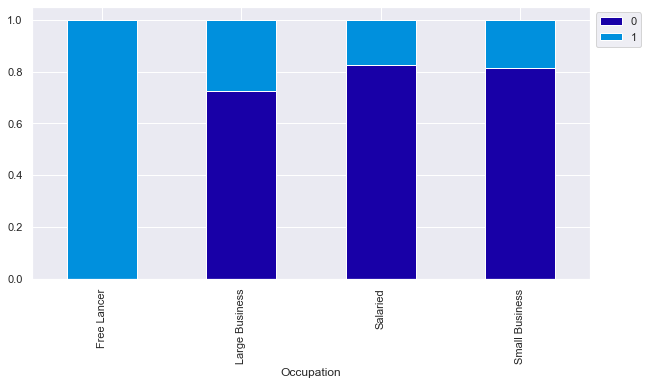

In [199]:
stacked_bar_chart(df['Occupation'])


####   OBSERVATIONS:
* Customers who are Free lancers have a very high chance of buying a package, but there were only 2 customers out of all 4888 who were free lancers and both bought the package, this is not sufficient data represeantation to have very definitive insight whether free lancers are going to buy more packages in the future. Myabe they have more flexibility in their work and can go on trips or maybe this was a coincidence, will need to keep an eye in the future and reevaluate with more data in subsequent years.
* Large Business owners have a high chance of buying a package
* Salaried and Small Business owners have the same chance of buying a product

In [200]:
df.groupby('Occupation').size()

Occupation
Free Lancer          2
Large Business     434
Salaried          2368
Small Business    2084
dtype: int64

ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


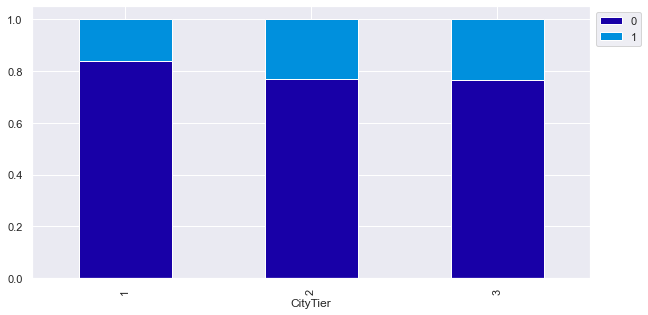

In [201]:
stacked_bar_chart(df['CityTier'])

####   OBSERVATIONS:
* Tier 2 and Tier 3 residents bought more packages than Tier 1 residents.

ProdTaken             0    1   All
NumberOfFollowups                 
1.0                 156   20   176
2.0                 205   24   229
3.0                1222  244  1466
4.0                1726  387  2113
5.0                 577  191   768
6.0                  82   54   136
All                3968  920  4888
------------------------------------------------------------------------------------------------------------------------


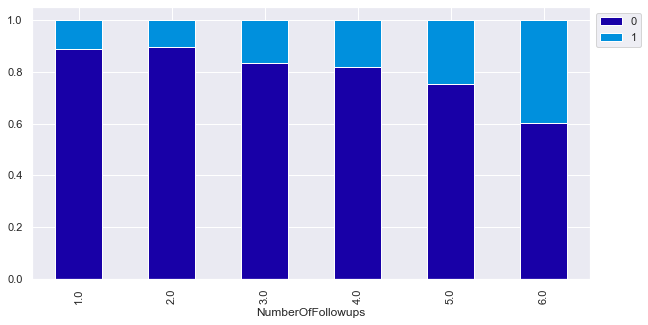

In [202]:
stacked_bar_chart(df['NumberOfFollowups'])

####   OBSERVATIONS:
* Customers who received a higher number of followups bought a package, that is, chances of a customer buying a package goes up if the salesperson follows up with them

ProdTaken                   0    1   All
NumberOfChildrenVisited                 
0.0                       880  202  1082
1.0                      1747  399  2146
2.0                      1082  253  1335
3.0                       259   66   325
All                      3968  920  4888
------------------------------------------------------------------------------------------------------------------------


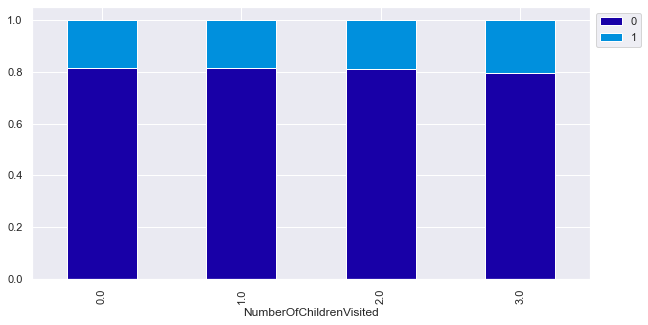

In [203]:
stacked_bar_chart(df['NumberOfChildrenVisited'])

####   OBSERVATIONS:
* Number of Children visited does not seem to affect the chances of a customer buying a package

ProdTaken                 0    1   All
NumberOfPersonVisited                 
1                        39    0    39
2                      1151  267  1418
3                      1942  460  2402
4                       833  193  1026
5                         3    0     3
All                    3968  920  4888
------------------------------------------------------------------------------------------------------------------------


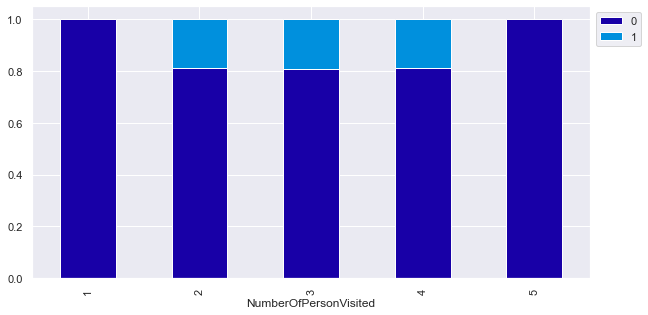

In [204]:
stacked_bar_chart(df['NumberOfPersonVisited'])

####   OBSERVATIONS:
* Customers who had 1 and 5 persons who visited with them they did not buy any product
* Customers who had 2,3 & 4 persons who visited with them have a 20% chance of buying a package

ProdTaken         0    1   All
NumberOfTrips                 
1.0             508  112   620
2.0            1293  311  1604
3.0             862  217  1079
4.0             417   61   478
5.0             396   62   458
6.0             258   64   322
7.0             156   62   218
8.0              76   29   105
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


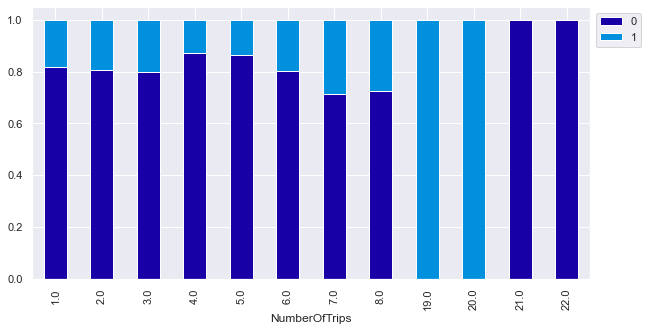

In [205]:
stacked_bar_chart(df['NumberOfTrips'])

In [206]:
df.groupby('NumberOfTrips').size()

NumberOfTrips
1.000000      620
2.000000     1604
3.000000     1079
4.000000      478
5.000000      458
6.000000      322
7.000000      218
8.000000      105
19.000000       1
20.000000       1
21.000000       1
22.000000       1
dtype: int64

####   OBSERVATIONS:
* Customers who took 19 and 20 trips had a 100% probability of buying a package. However, there were only 1 customer each who took 19 and 20 trips and they both bought the package. The number of customers with that many trips is not sufficient to make a good insight. these seem to be an outlier. 
* Customers who take 7 and 8 trips every year have an almost 30% chance of buying a package
* Customers who take 1, 2, 3 and 6 trips every year have about 20% chance of buying a package
* Customers who take 4 and 5 trips every year have only 15% chance of buying a package


ProdTaken     0    1   All
OwnCar                    
0          1496  360  1856
1          2472  560  3032
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


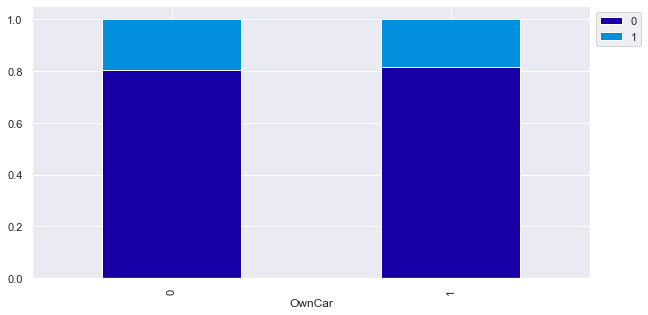

In [207]:
stacked_bar_chart(df['OwnCar'])

####   OBSERVATIONS:
* Owning a car did not increase the chances of a customer buying a package.

ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


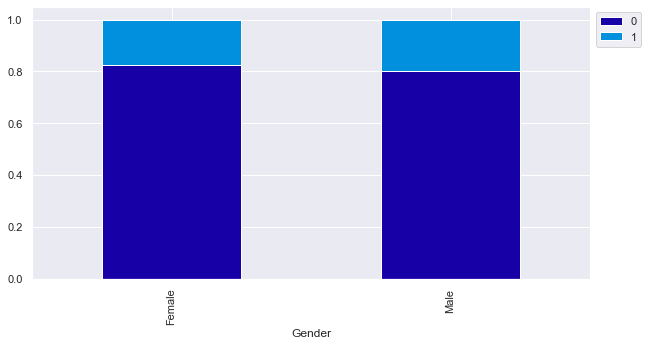

In [208]:
stacked_bar_chart(df['Gender'])

####   OBSERVATIONS:
* Men had slightly more chance of buying a package than women.

ProdTaken                0    1   All
PreferredLoginDevice                 
Company Invited       1109  310  1419
Self Enquiry          2859  610  3469
All                   3968  920  4888
------------------------------------------------------------------------------------------------------------------------


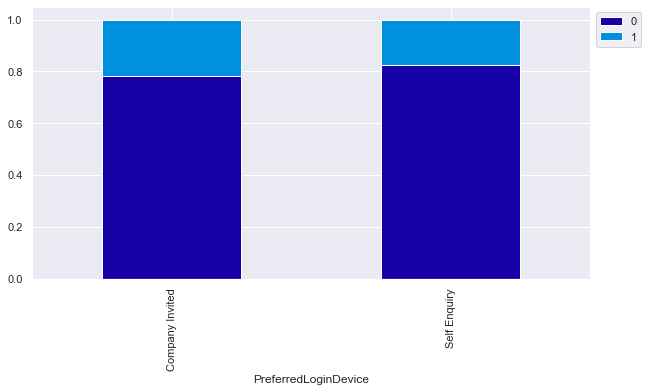

In [209]:
stacked_bar_chart(df['PreferredLoginDevice'])

####   OBSERVATIONS:
* Customers who were invited by the company had about 21% chance of buying a package as opposed to the slightly lower 19% 

ProdTaken          0    1   All
ProductPitched                 
Deluxe           322   20   342
King             210   20   230
Multi           1290  552  1842
Standard         618  124   742
Super Deluxe    1528  204  1732
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


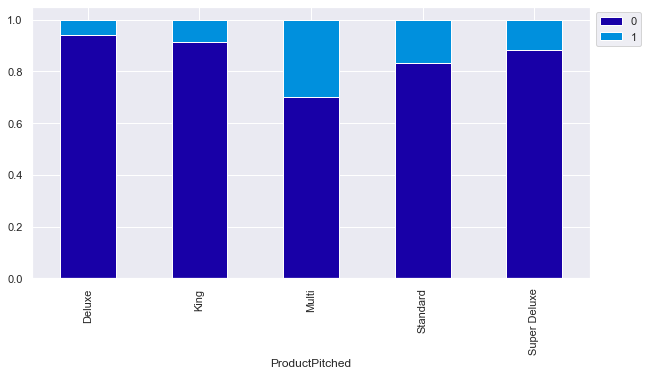

In [210]:
stacked_bar_chart(df['ProductPitched'])

####   OBSERVATIONS:
* Customers who were pitched multiple products had the highedt probability of 30% of buying a package.
* About 19% of customers who were pitched the Standard package bought the package followed by about 11% of those who were pitched the Super Deluxe package.
* When Deluxe and King packages were pitched, less than 10% customers bought the product.
* INSIGHT: Salesperson shoulf pitch multiple products to the customers to oncrease chances of them buying a package

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


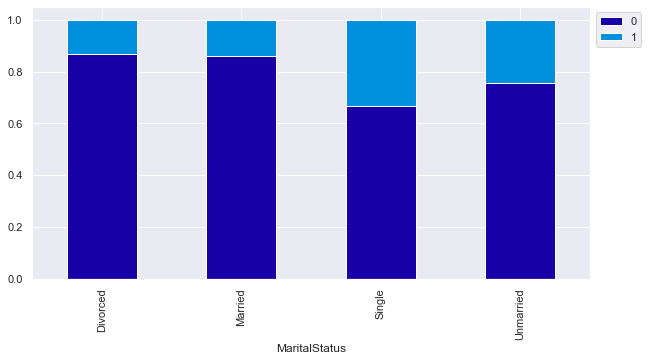

In [211]:
stacked_bar_chart(df['MaritalStatus'])

####   OBSERVATIONS:
* Single customers had about a 30% chance of buying a package, followed by unmarried customers
* Divorced and Married had a low probability of buying a package, possibly due to added responsibility

ProdTaken                 0    1   All
PreferredPropertyStar                 
3.0                    2531  488  3019
4.0                     731  182   913
5.0                     706  250   956
All                    3968  920  4888
------------------------------------------------------------------------------------------------------------------------


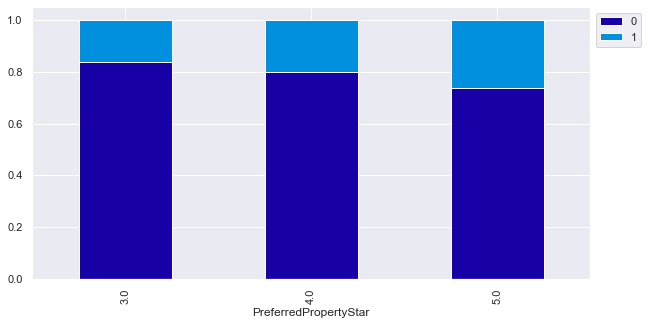

In [212]:
stacked_bar_chart(df['PreferredPropertyStar'])

In [213]:
df.groupby('PreferredPropertyStar').size()

PreferredPropertyStar
3.0    3019
4.0     913
5.0     956
dtype: int64

####   OBSERVATIONS:
* Customers who had a preference for 5 star properties had the highest probability of around 25% of buying a package
* INSIGHT: Customers with a preference of 4 and 5 star. properties have a higher probability of buying a package


ProdTaken     0    1   All
Passport                  
0          3040  426  3466
1           928  494  1422
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


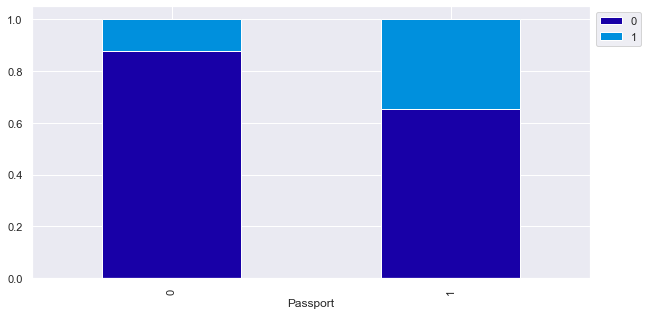

In [214]:
stacked_bar_chart(df['Passport'])

####   OBSERVATIONS:
* Customers with passports have a high, almost 35% probability of buying a package
* Customers without passport have a very low, about 12% probability of buying a package. this is much lower than the average 18% customers who bought packages

ProdTaken                  0    1   All
PitchSatisfactionScore                 
1                        798  144   942
2                        498   88   586
3                       1162  316  1478
4                        750  162   912
5                        760  210   970
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


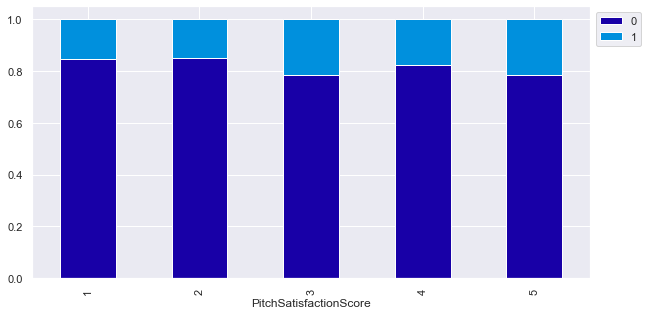

In [215]:
stacked_bar_chart(df['PitchSatisfactionScore'])

####   OBSERVATIONS:
* Customers who gave a pitch satisfaction score of 3 and 5 are the most likely to purchase a package at about 22%
* Customers who gave a pitch satisfaction score of 1 and 2 have a probability lower than the average 18% of buying a package.

ProdTaken     0    1   All
Age                       
18.0          6    8    14
19.0         11   21    32
20.0         13   25    38
21.0         18   23    41
22.0         31   15    46
23.0         33   13    46
24.0         38   18    56
25.0         54   20    74
26.0         69   37   106
27.0        108   30   138
28.0        121   26   147
29.0        121   57   178
30.0        151   48   199
31.0        162   41   203
32.0        157   40   197
33.0        149   40   189
34.0        167   44   211
35.0        203   34   237
36.0        386   71   457
37.0        161   24   185
38.0        161   15   176
39.0        136   14   150
40.0        123   23   146
41.0        131   24   155
42.0        122   20   142
43.0        120   10   130
44.0         88   17   105
45.0         98   18   116
46.0        110   11   121
47.0         76   12    88
48.0         54   11    65
49.0         56    9    65
50.0         74   12    86
51.0         73   17    90
52.0         54   14    68
5

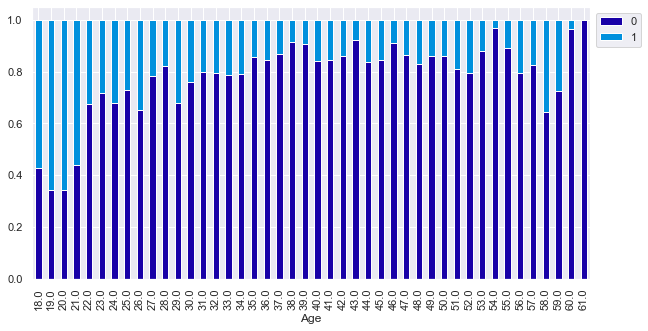

In [216]:
stacked_bar_chart(df['Age'])

####   OBSERVATIONS:
* Customers younger than 22 years of age had a bery high probability of buying a package, but there were fewer of these customers compared to ages between 26 and 46


ProdTaken           0    1   All
DurationOfPitch                 
5.0                 6    0     6
6.0               268   39   307
7.0               294   48   342
8.0               273   60   333
9.0               404   79   483
10.0              199   45   244
11.0              168   37   205
12.0              162   33   195
13.0              397   77   474
14.0              212   41   253
15.0              217   52   269
16.0              218   56   274
17.0              148   24   172
18.0               56   19    75
19.0               36   21    57
20.0               46   19    65
21.0               57   16    73
22.0               66   23    89
23.0               58   21    79
24.0               54   16    70
25.0               59   14    73
26.0               60   12    72
27.0               58   14    72
28.0               44   17    61
29.0               53   21    74
30.0               65   30    95
31.0               52   31    83
32.0               59   15    74
33.0      

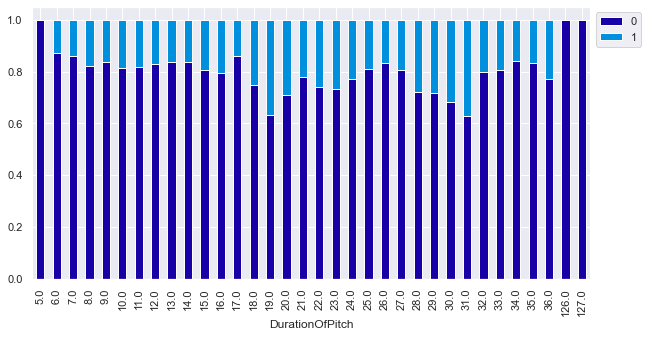

In [217]:
stacked_bar_chart(df['DurationOfPitch'])

####   OBSERVATIONS:
* 19 and 31 minute pitches had the highest probability of about 37% of buying a package

ProdTaken         0    1   All
NumberOfTrips                 
1.0             508  112   620
2.0            1293  311  1604
3.0             862  217  1079
4.0             417   61   478
5.0             396   62   458
6.0             258   64   322
7.0             156   62   218
8.0              76   29   105
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


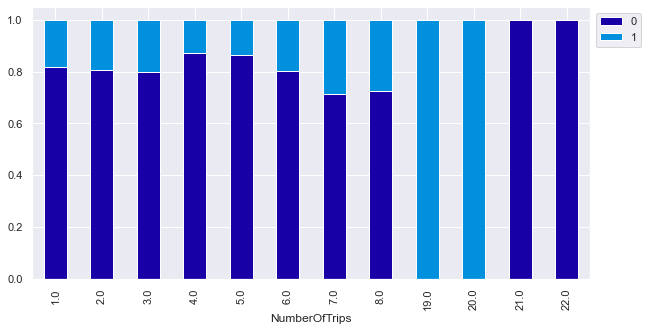

In [218]:
stacked_bar_chart(df['NumberOfTrips'])

####   OBSERVATIONS:
* Customers who take 19 trips or more are outliers, there is not enough data on these people for any intelligible insight.
* Customers who take 7 and 8. trips annualy have the highest probability of 30% of buying a package.
* People who take 4 and 5 trips annualy have less than the average probability of 18% of buying a package

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


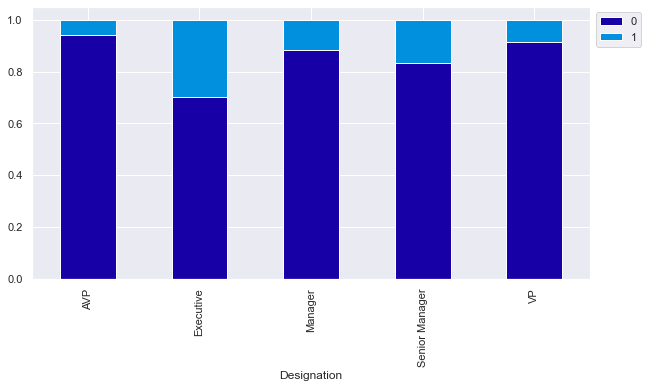

In [219]:
stacked_bar_chart(df['Designation'])

####   OBSERVATIONS:
* Customers who are AVPs and VPs earn a higher salary but have a much lower than the average 18% probability of buying a package. INSIGHT: Need to figure out how to make the packages more attractive to this demographic as they can definitely afford the packages, so why aren't they buying them?
* Customers who hold Executive positions have the highest probability of 30% of buying a package. Need to reach out to these customers more.
* Senioe managers have the average probability of buying a package.

## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Build model on the train data.
4. Tune the model if required.
5. Test the data on test set.

## Split Data

* Because there is a significant imbalance in the target classes, we will use stratify parameter when splitting into train and test data

In [220]:
#drop CUstomer Interaction data variables from data
X = df.drop(['ProdTaken','PitchSatisfactionScore','ProductPitched', 'NumberOfFollowups','DurationOfPitch'], axis = 1)
X = pd.get_dummies(X,drop_first= True)
y = df['ProdTaken']


In [221]:
# Split data into. train and test set using stratify parameter 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(3421, 28) (1467, 28)


In [222]:
y.value_counts(1)

0   0.811784
1   0.188216
Name: ProdTaken, dtype: float64

In [223]:
y_test.value_counts(1)

0   0.811861
1   0.188139
Name: ProdTaken, dtype: float64

In [224]:
y_train.value_counts(1)

0   0.811751
1   0.188249
Name: ProdTaken, dtype: float64

## Model evaluation criterion

### Wrong predictions by Model can be:
1. Predicting a customer is likely to purchase the long term travel package but they don't, that is FP 
2. Predicting a customer is not likely to purchase the long term travel package but they do buy it, that is FN 

### Which case is more important? 
* Predicting a customer is likely to purchase the long term travel package but they don't buy it, FP, because the company has mentioned that they want to keep marketing costs down and by predicting wrongly that a customer will buy, marketing resouces will be spent on that customer where they could have been spent on a customer who had more chances of actually buying it.

### To reduce this loss we need to minimize False Positives
* Company wants to keep marketing costs down so they want to spend their resources as much as possible on people wwho have a higher chance of buying the package. They want to minimize False Positives so resources are not spent in the wrong place, and this can be done by maximizing Precision.



**Define function to provide accuracy,recall and precision on the train and test set and to show confusion matrix**

In [233]:
##  Function to calculate recall
def get_recall_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [234]:
##  Function to calculate precision 
def get_precision_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [235]:
##  Function to calculate accuracy 
def get_accuracy_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [236]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Build Decision Tree Model

* Build Decision Tree Model using default 'gini' criteria to split. 
* We want to minimize FP which means we want to Maximize Precision or we could say we want to identify the true negatives better(class 0) so company. does not waste marketing resources on these people. 
* we will assign class  weights of {0:0.19, 1:0.81)

In [238]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1)

In [239]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

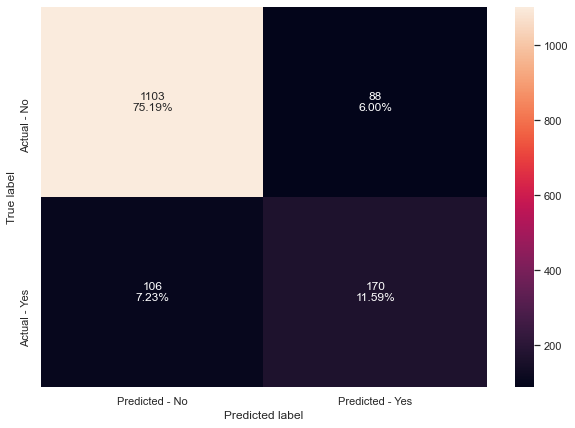

In [240]:
make_confusion_matrix(dtree,y_test)

* TN = 75.19%
* TP = 11.59%
* FN = 7.23%
* FP = 6.00%

In [241]:
dtree_acc = get_accuracy_score(dtree)
dtree_recall = get_recall_score(dtree)
dtree_precision = get_precision_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8677573278800272
Recall on training set :  1.0
Recall on test set :  0.6159420289855072
Precision on training set :  1.0
Precision on test set :  0.6589147286821705


####   OBSERVATIONS:

* Decision tree is overfitting on the training data and is not able to generalize well on the test data concerning the low precision of 66%

### Bagging Classifier

In [242]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

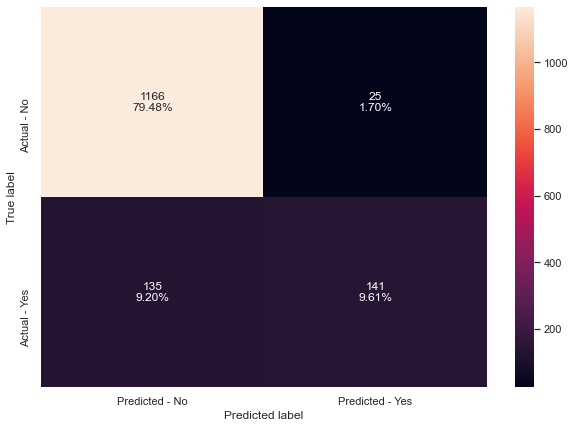

In [243]:
make_confusion_matrix(bagging,y_test)

* TN = 79.48%
* TP = 9.61%
* FN = 9.2%
* FP = 1.70%

* FP are already pretty low in the Bagging Model

In [244]:
bagging_acc = get_accuracy_score(bagging)
bagging_recall = get_recall_score(bagging)
bagging_precision = get_precision_score(bagging)

Accuracy on training set :  0.9915229465068693
Accuracy on test set :  0.89093387866394
Recall on training set :  0.9580745341614907
Recall on test set :  0.5108695652173914
Precision on training set :  0.9967689822294022
Precision on test set :  0.8493975903614458


####   OBSERVATIONS:

* Bagging Classifier is overfitting on the training data but the Precision is already at 84.9%. Let's see if we will be able to improve it more

**Try Bagging Classifier with weighted decision tree**

In [245]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        random_state=1),
                  random_state=1)

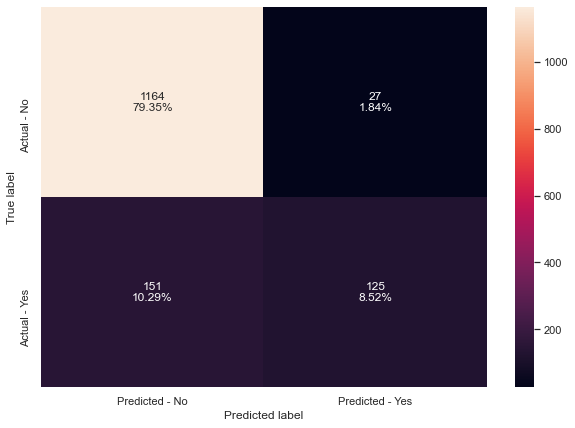

In [246]:
make_confusion_matrix(bagging_wt,y_test)

* TN = 79.35%
* TP = 8.52%
* FN = 10.29%
* FP = 1.84%

In [247]:
wt_bagging_acc = get_accuracy_score(bagging_wt)
wt_bagging_recall = get_recall_score(bagging_wt)
wt_bagging_precision = get_precision_score(bagging_wt)

Accuracy on training set :  0.9900613855597779
Accuracy on test set :  0.8786639400136332
Recall on training set :  0.9487577639751553
Recall on test set :  0.4528985507246377
Precision on training set :  0.9983660130718954
Precision on test set :  0.8223684210526315


####   OBSERVATIONS:

* Bagging Classifier with a weighted decision tree is giving good accurcay but the precision and recall are lower than the one without class weights.

## Random Forest

In [248]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

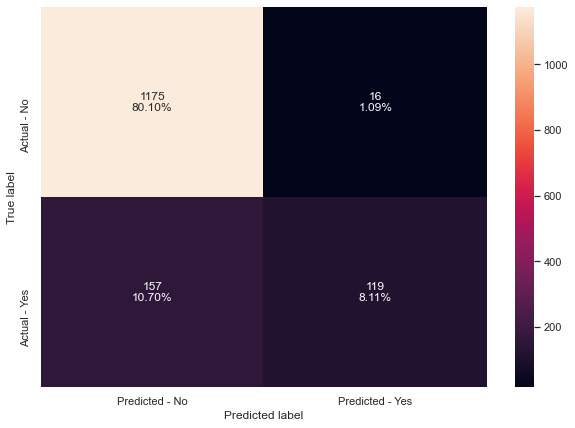

In [249]:
make_confusion_matrix(rf,y_test)

* TN = 80.10%
* TP = 8.11%
* FN = 10.7%
* FP = 1.09%

In [250]:
rf_acc = get_accuracy_score(rf)
rf_recall = get_recall_score(rf)
rf_precision = get_precision_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.8820722563053851
Recall on training set :  1.0
Recall on test set :  0.4311594202898551
Precision on training set :  1.0
Precision on test set :  0.8814814814814815


####   OBSERVATIONS:

* Random Forest is overfitting on training data with good accurcay and precision but it is not generalizing well on test data for Precision metric

**Random Forest with class weights**

In [251]:
rf_wt = RandomForestClassifier(class_weight = {0:0.19,1:0.81},random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

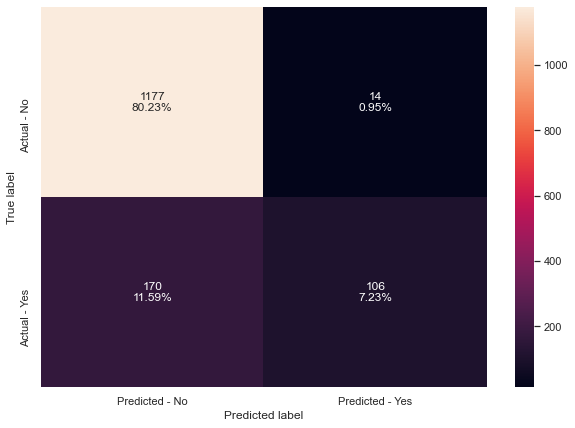

In [252]:
make_confusion_matrix(rf_wt,y_test)

* TN = 80.23%
* TP = 7.23%
* FN = 11.59%
* FP = 0.95%

In [253]:
rf_wt_acc = get_accuracy_score(rf)
rf_wt_recall = get_recall_score(rf)
rf_wt_precision = get_precision_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.8820722563053851
Recall on training set :  1.0
Recall on test set :  0.4311594202898551
Precision on training set :  1.0
Precision on test set :  0.8814814814814815


####   OBSERVATIONS:

* There is no difference in the metrics of the weighted Random Forest compared to the unweighted Random Forest.

### Tuning  the  Models

### GridSearchfor Hyperparameter tuning

#### Decision Tree tuning using GridSearch

In [254]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=3,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       random_state=1)

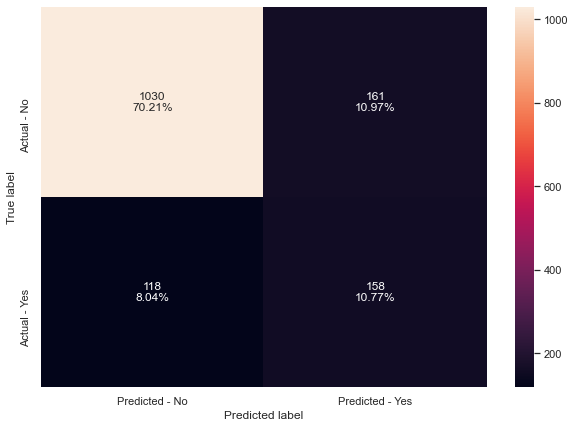

In [255]:
make_confusion_matrix(dtree_estimator,y_test)

* TN = 70.21%
* TP = 10.77%
* FN = 8.04%
* FP = 10.97%

In [256]:

tuned_dtree_acc = get_accuracy_score(dtree_estimator)
tuned_dtree_recall = get_recall_score(dtree_estimator)
tuned_dtree_precision = get_precision_score(dtree_estimator)

Accuracy on training set :  0.7869044139140602
Accuracy on test set :  0.8098159509202454
Recall on training set :  0.5667701863354038
Recall on test set :  0.572463768115942
Precision on training set :  0.44785276073619634
Precision on test set :  0.4952978056426332


####   OBSERVATIONS:

* Overfitting in Decision Tree has reduced but Precision has dropped to 49% 
* Need to change the hyperparameters in Gridsearch. Increase max depth to 50

#### Decision Tree tuning using GridSearch with min_samples_leaf = [1, 2, 5, 7, 10, 15, 18] and max_leaf_nodes : [2, 3, 5, 10, 15, 20]

In [257]:
# Choose the type of classifier. 
dtree_estimator_2 = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10, 15, 18],
              'max_leaf_nodes' : [2, 3, 5, 10,15, 20],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator_2, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator_2 = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=6,
                       max_leaf_nodes=20, min_impurity_decrease=0.0001,
                       random_state=1)

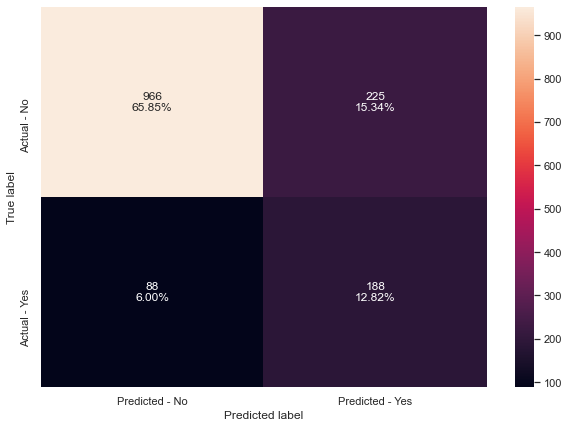

In [258]:
make_confusion_matrix(dtree_estimator_2,y_test)

* TN = 65.85%
* TP = 12.82%
* FN = 6%
* FP = 15.34%

In [259]:
tuned_dtree_acc = get_accuracy_score(dtree_estimator_2)
tuned_dtree_recall = get_recall_score(dtree_estimator_2)
tuned_dtree_precision = get_precision_score(dtree_estimator_2)

Accuracy on training set :  0.7871967261034785
Accuracy on test set :  0.7866394001363326
Recall on training set :  0.6785714285714286
Recall on test set :  0.6811594202898551
Precision on training set :  0.4561586638830898
Precision on test set :  0.4552058111380145


####   OBSERVATIONS:

* Recall has improved but the precision is lower than before

**Tuning Bagging Classifier using GridSearch**

In [268]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101,301,501],
              'max_features': [0.5,0.6,0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'precision', cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight={0: 0.19,
                                                                                 1: 0.81},
                                                                   random_state=1)],
                         'max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101, 301, 501]},
             scoring='precision')

In [269]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        random_state=1),
                  max_features=0.5, n_estimators=301, random_state=1)

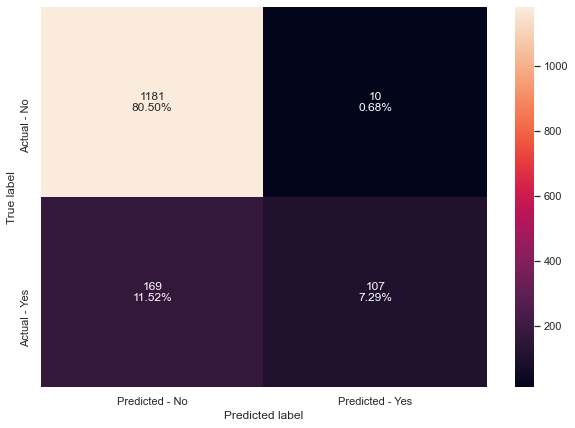

In [270]:
make_confusion_matrix(bagging_estimator,y_test)

* TN = 80.50%
* TP = 7.29%
* FN = 11.52%
* FP = 0.68%

In [271]:
tuned_bagging_acc= get_accuracy_score(bagging_estimator)
tuned_bagging_recall = get_recall_score(bagging_estimator)
tuned_bagging_precision = get_precision_score(bagging_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.8779822767552828
Recall on training set :  1.0
Recall on test set :  0.38768115942028986
Precision on training set :  1.0
Precision on test set :  0.9145299145299145


####   OBSERVATIONS:

* Bagging with GridSearch is still overfitting but the Precision Score is very high, even though recall is low

**Tuning Random Forest using GridSearch**

In [305]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [110,251,501,600,650],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}


# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='precision',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', max_samples=0.9, n_estimators=501,
                       random_state=1)

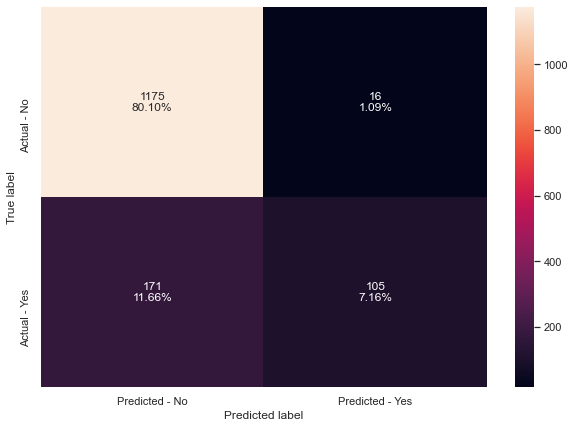

In [306]:
make_confusion_matrix(rf_estimator,y_test)

* TN = 80.10%
* TP = 7.16%
* FN = 11.66%
* FP = 1.09%

In [307]:
tuned_rf_acc = get_accuracy_score(rf_estimator)
tuned_rf_recall = get_recall_score(rf_estimator)
tuned_rf_precision = get_precision_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.8725289706884799
Recall on training set :  1.0
Recall on test set :  0.3804347826086957
Precision on training set :  1.0
Precision on test set :  0.8677685950413223


*  Random Forest after tuning gives almost the same performance as before tuning, actually Precision is lower and Recall is much much lower than untuned Random Forest

### Comparing the models

In [275]:
# defining list of models
models = [dtree,dtree_estimator,dtree_estimator_2,bagging,bagging_wt,bagging_estimator,rf,rf_wt,rf_estimator]
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])
    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [276]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Tuned Decision tree 2','Bagging Classifier',
                                          'Weighted Bagging Classifier','Tuned Bagging Classifier',
                                          'Random Forest','Weighted Random Forest','Tuned Random Forest'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree,1.000000,0.867757,1.000000,0.615942,1.000000,0.658915
1,Tuned Decision Tree,0.786904,0.809816,0.566770,0.572464,0.447853,0.495298
2,Tuned Decision tree 2,0.787197,0.786639,0.678571,0.681159,0.456159,0.455206
3,Bagging Classifier,0.991523,0.890934,0.958075,0.510870,0.996769,0.849398
4,Weighted Bagging Classifier,0.990061,0.878664,0.948758,0.452899,0.998366,0.822368
5,Tuned Bagging Classifier,1.000000,0.877982,1.000000,0.387681,1.000000,0.914530
6,Random Forest,1.000000,0.882072,1.000000,0.431159,1.000000,0.881481
7,Weighted Random Forest,1.000000,0.874574,1.000000,0.384058,1.000000,0.883333
8,Tuned Random Forest,1.000000,0.872529,1.000000,0.380435,1.000000,0.867769


### Feature importance of Random Forest

In [277]:
# Gini importance of features in rf
pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False)

,Imp
MonthlyIncome,0.177455
Age,0.160578
NumberOfTrips,0.087471
Passport_1,0.074791
CityTier_3,0.034980
Designation_Executive,0.033478
Gender_Male,0.032897
MaritalStatus_Single,0.031353
PreferredLoginDevice_Self Enquiry,0.031317
OwnCar_1,0.030040


In [484]:
pd.DataFrame(rf_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False)

,Imp
MonthlyIncome,0.172533
Age,0.157686
NumberOfTrips,0.091153
Passport_1,0.072899
Designation_Executive,0.034680
CityTier_3,0.034616
Gender_Male,0.033772
MaritalStatus_Single,0.032350
PreferredLoginDevice_Self Enquiry,0.031991
OwnCar_1,0.030649


In [278]:
feature_names = X_train.columns

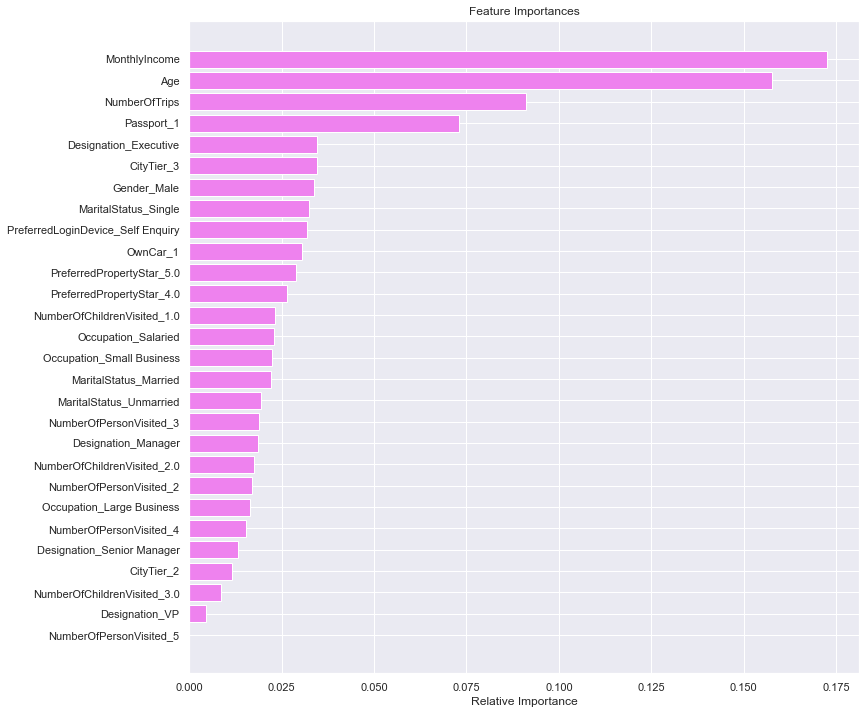

In [279]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Boosting Models

### ADaBoosting

In [281]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

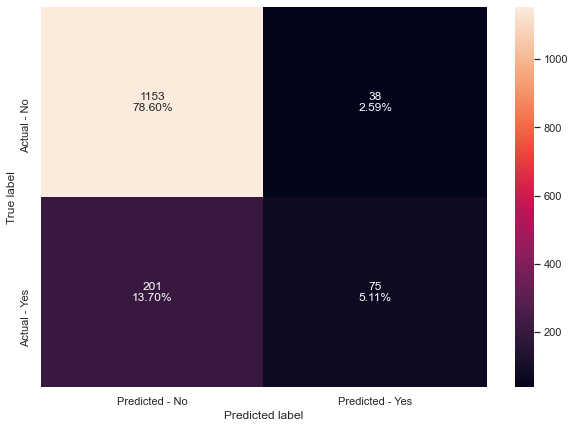

In [282]:
make_confusion_matrix(abc,y_test)

* TN = 78.60%
* TP = 5.11%
* FN = 13.70%
* FP = 2.59%

In [283]:
tuned_rf_acc = get_accuracy_score(abc)
tuned_rf_recall = get_recall_score(abc)
tuned_rf_precision = get_precision_score(abc)

Accuracy on training set :  0.8447822274188833
Accuracy on test set :  0.8370824812542604
Recall on training set :  0.2701863354037267
Recall on test set :  0.2717391304347826
Precision on training set :  0.7404255319148936
Precision on test set :  0.6637168141592921


####   OBSERVATIONS:

* Model is not overfitting but the Precision score is quite low.

#### Hyperparameter Tuning ADaBoost Classifier

In [284]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,1,0.1)
}

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.8, n_estimators=100, random_state=1)

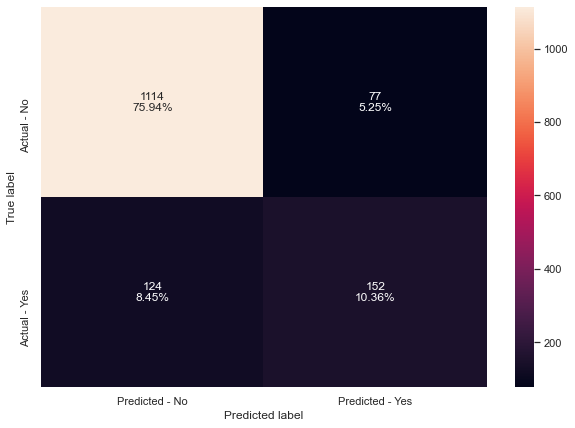

In [285]:
make_confusion_matrix(abc_tuned,y_test)

* TN = 75.94%
* TP = 10.36%
* FN = 8.45%
* FP = 5.25%

In [286]:
tuned_rf_acc = get_accuracy_score(abc_tuned)
tuned_rf_recall = get_recall_score(abc_tuned)
tuned_rf_precision = get_precision_score(abc_tuned)

Accuracy on training set :  0.9669687225957322
Accuracy on test set :  0.8629856850715747
Recall on training set :  0.860248447204969
Recall on test set :  0.5507246376811594
Precision on training set :  0.9601386481802426
Precision on test set :  0.6637554585152838


####   OBSERVATIONS:

* The model is performing well on train data but not on test data. Precision value has not improved by hypertuning

### Gradient Boosting Classifier

In [287]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

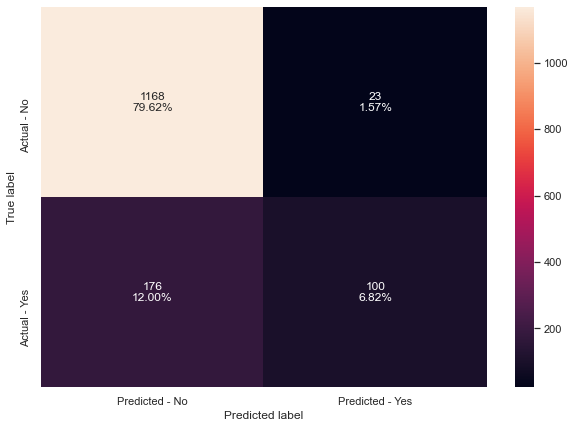

In [288]:
make_confusion_matrix(gbc,y_test)

* TN = 79.62%
* TP = 6.82%
* FN = 12.00%
* FP = 1.57%

In [289]:
tuned_rf_acc = get_accuracy_score(gbc)
tuned_rf_recall = get_recall_score(gbc)
tuned_rf_precision = get_precision_score(gbc)

Accuracy on training set :  0.8789827535808243
Accuracy on test set :  0.8643490115882754
Recall on training set :  0.43167701863354035
Recall on test set :  0.36231884057971014
Precision on training set :  0.852760736196319
Precision on test set :  0.8130081300813008


####   OBSERVATIONS:

* The model is not overfitting and the Precision score is reasonable.

#### Hyperparameter Tuning for Gradient Boost Classifier

**Use ADaBoost Classifier as estimator for initial prediction**

In [290]:

gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

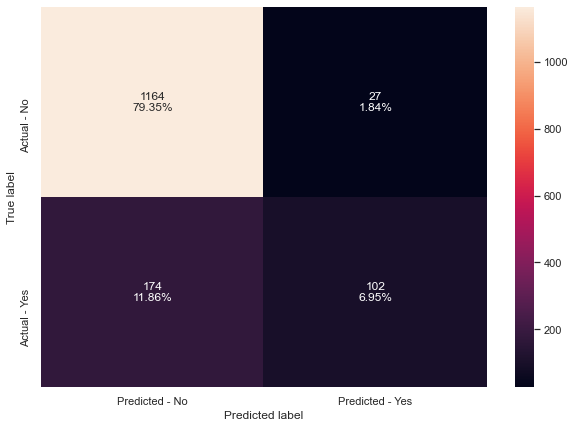

In [291]:
make_confusion_matrix(gbc_init,y_test)

* TN = 79.35%
* TP = 6.95%
* FN = 11.86%
* FP = 1.84%

In [292]:
tuned_rf_acc = get_accuracy_score(gbc_init)
tuned_rf_recall = get_recall_score(gbc_init)
tuned_rf_precision = get_precision_score(gbc_init)

Accuracy on training set :  0.8786904413914061
Accuracy on test set :  0.8629856850715747
Recall on training set :  0.42701863354037267
Recall on test set :  0.3695652173913043
Precision on training set :  0.8566978193146417
Precision on test set :  0.7906976744186046


####   OBSERVATIONS:

* The model is not overfitting but the Precision score is lower than the simple Gradient Boost Classifier

In [304]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,400,450,500,600,650],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations


# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=500, random_state=1,
                           subsample=0.9)

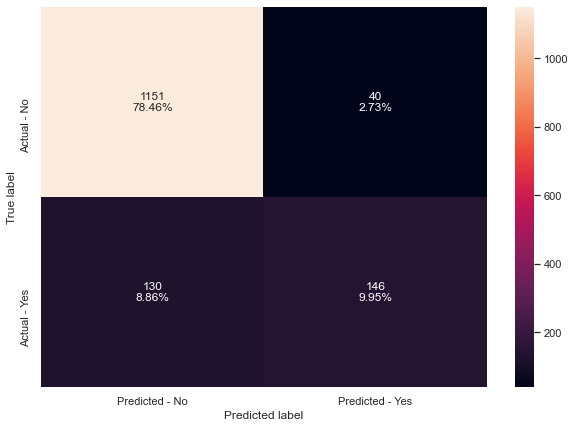

In [308]:
make_confusion_matrix(gbc_tuned,y_test)

* TN = 78.46%
* TP = 9.95%
* FN = 8.86%
* FP = 2.73%

In [310]:
tuned_rf_acc = get_accuracy_score(gbc_tuned)
tuned_rf_recall = get_recall_score(gbc_tuned)
tuned_rf_precision = get_precision_score(gbc_tuned)

Accuracy on training set :  0.9415375621163402
Accuracy on test set :  0.8841172460804363
Recall on training set :  0.7127329192546584
Recall on test set :  0.5289855072463768
Precision on training set :  0.9683544303797469
Precision on test set :  0.7849462365591398


####   OBSERVATIONS:

* The tuned model is not giving a better Precision score

### XGBoost Classifier


In [115]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

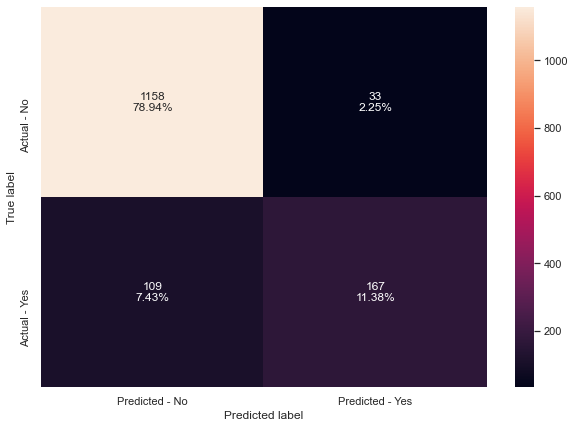

In [229]:
make_confusion_matrix(xgb,y_test)

* TN = 78.94%
* TP = 11.38%
* FN = 7.43%
* FP = 2.25%

In [230]:
tuned_rf_acc = get_accuracy_score(xgb)
tuned_rf_recall = get_recall_score(xgb)
tuned_rf_precision = get_precision_score(xgb)

Accuracy on training set :  0.9961999415375621
Accuracy on test set :  0.9032038173142468
Recall on training set :  0.9798136645962733
Recall on test set :  0.605072463768116
Precision on training set :  1.0
Precision on test set :  0.835


####   OBSERVATIONS:

* The XGBoost Classifier is overfitting but giving good Precision on test data

#### Hyperparameter Tuning for XGBoost Classifier

In [261]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(30,100,20),
    "subsample":[0.5,0.7,1],
    "learning_rate":[0.001,0.01,0.05,0.1],
    "colsample_bytree":[0.5,0.7,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

In [262]:
# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

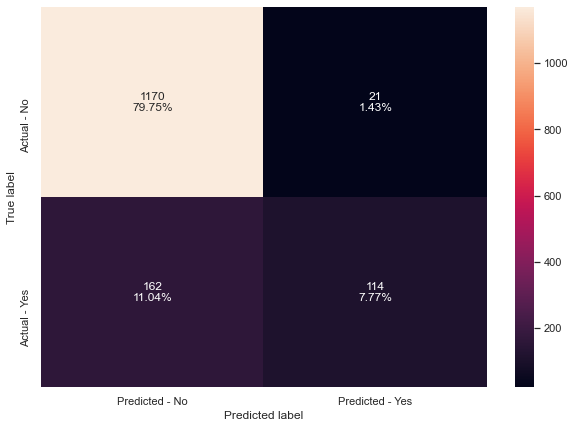

In [263]:
make_confusion_matrix(xgb_tuned,y_test)

* TN = 79.75%
* TP = 7.77%
* FN = 11.04%
* FP = 1.43%

In [331]:
tuned_rf_acc = get_accuracy_score(xgb_tuned)
tuned_rf_recall = get_recall_score(xgb_tuned)
tuned_rf_precision = get_precision_score(xgb_tuned)

Accuracy on training set :  0.9321835720549547
Accuracy on test set :  0.8752556237218814
Recall on training set :  0.656832298136646
Recall on test set :  0.41304347826086957
Precision on training set :  0.9746543778801844
Precision on test set :  0.8444444444444444


####   OBSERVATIONS:

* The tuned XGBoost Classifier is not overfitting Precision score has improved after tuning as well

## Stacking Model

In [316]:
estimators=[('Bagging Classifier', bagging),('Random Forest', rf_estimator),
           ('Gradient Boosting', gbc)]
final_estimator=XGBClassifier(random_state=1)

In [317]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

[01:49:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(cv=5,
                   estimators=[('Bagging Classifier',
                                BaggingClassifier(random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_features='log2',
                                                       max_samples=0.9,
                                                       n_estimators=501,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(random_state=1))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 colsample_bylevel=None,
                                                 co...
                                                 importance_type='gain',
                                                 interaction_constraints=None,
                   

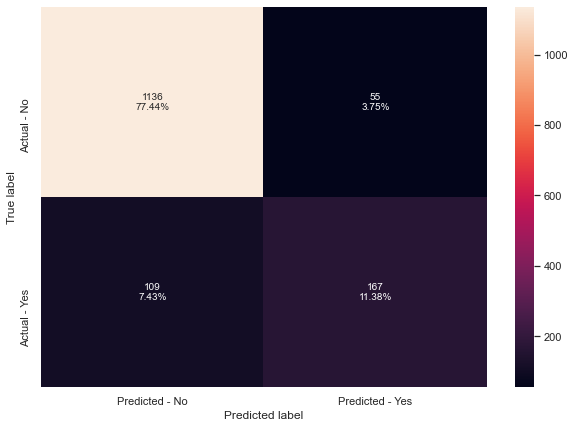

In [332]:
make_confusion_matrix(stacking_estimator,y_test)

* TN = 79.75%
* TP = 7.77%
* FN = 11.04%
* FP = 1.43%

In [333]:
tuned_rf_acc = get_accuracy_score(stacking_estimator)
tuned_rf_recall = get_recall_score(stacking_estimator)
tuned_rf_precision = get_precision_score(stacking_estimator)

Accuracy on training set :  0.9991230634317451
Accuracy on test set :  0.8882072256305386
Recall on training set :  1.0
Recall on test set :  0.605072463768116
Precision on training set :  0.9953632148377125
Precision on test set :  0.7522522522522522


### Comparing the models

In [319]:
# defining list of models
models = [dtree,dtree_estimator,dtree_estimator_2,bagging,bagging_wt,bagging_estimator,rf,rf_wt,rf_estimator,abc,abc_tuned,gbc,gbc_init,gbc_tuned,xgb,xgb_tuned,stacking_estimator]
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])
    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [320]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Tuned Decision tree 2','Bagging Classifier',
                                          'Weighted Bagging Classifier','Tuned Bagging Classifier',
                                          'Random Forest','Weighted Random Forest','Tuned Random Forest','Adaboost Classifier',
                                          'Tuned Adaboost Classifier','Gradient Boosting Classifier'
                                          ,'Gradient Boosting Classifier with Adaboost'
                                          ,'Tuned Gradient Boosting Classifier','XGBoost classifier',
                                          'Tuned XGBoost Classifier','Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree,1.000000,0.867757,1.000000,0.615942,1.000000,0.658915
1,Tuned Decision Tree,0.786904,0.809816,0.566770,0.572464,0.447853,0.495298
2,Tuned Decision tree 2,0.787197,0.786639,0.678571,0.681159,0.456159,0.455206
3,Bagging Classifier,0.991523,0.890934,0.958075,0.510870,0.996769,0.849398
4,Weighted Bagging Classifier,0.990061,0.878664,0.948758,0.452899,0.998366,0.822368
5,Tuned Bagging Classifier,1.000000,0.877982,1.000000,0.387681,1.000000,0.914530
6,Random Forest,1.000000,0.882072,1.000000,0.431159,1.000000,0.881481
7,Weighted Random Forest,1.000000,0.874574,1.000000,0.384058,1.000000,0.883333
8,Tuned Random Forest,1.000000,0.872529,1.000000,0.380435,1.000000,0.867769
9,Adaboost Classifier,0.844782,0.837082,0.270186,0.271739,0.740426,0.663717


####   OBSERVATIONS:

* The tuned XGBoost Classifier is giving a good Precision score without overfitting the data.
* The weighted Random Forest gives the highest Precision of 0.88 but it is overfitting the data

### Feature Importances 

**Random Forest**

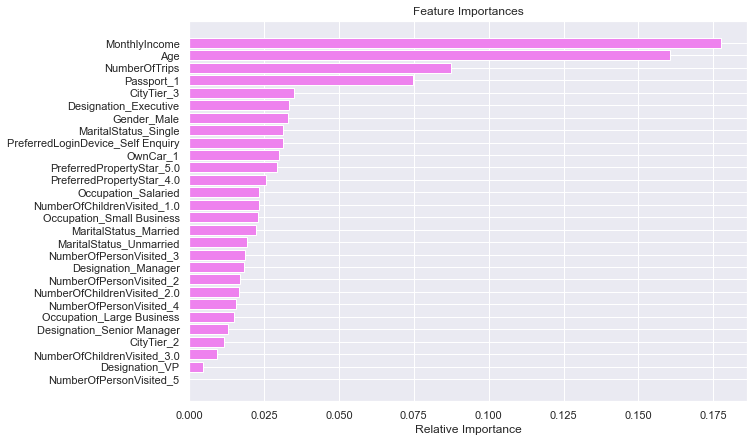

In [321]:
feature_names = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Gradient Boost Classifier**

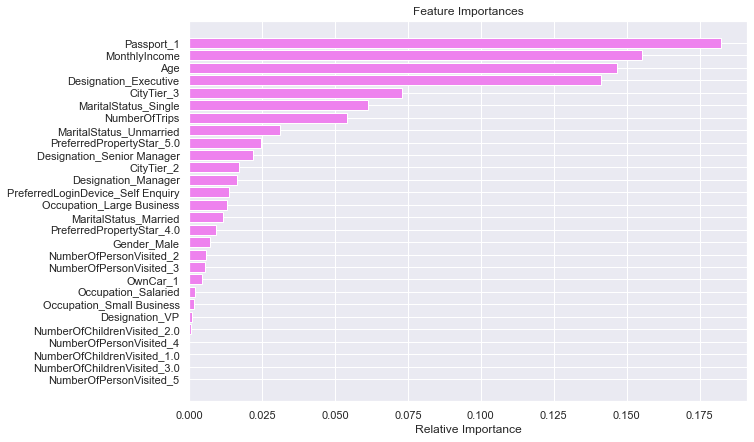

In [326]:
feature_names = X_train.columns
importances = gbc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Tuned XGBoost Classifier**

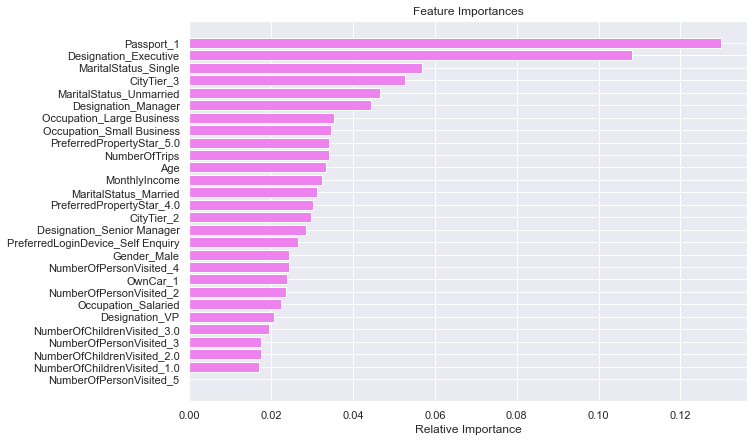

In [328]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()